## eval

In [4]:
with open('/home/v-nianran/src/MOLLEO/multi_objective/ini_smiles','r') as f:
    a = f.readlines()
a = [i.replace('\n','') for i in a]
a

['CNS(=O)(=O)c1ccc(C(=O)N2C[C@@H](C)OCC2(C)C)cc1',
 'COc1cc(-c2cc(NCC[NH+](C)C)nc3[nH]ccc23)ccc1O',
 'O=C(Cc1csc(-c2cccc(F)c2)n1)N(Cc1ccccc1F)C1CC1',
 'CCCCN(C)C(=O)C1CCN(C(=O)[C@@H]2CCCN(S(=O)(=O)c3ccc(C)s3)C2)CC1',
 'Cc1cccc(NC(=O)CN2C(=O)N[C@](C)(c3cccc(Br)c3)C2=O)c1',
 'O=C(Nc1nc2c(s1)CCC[C@H]2C(=O)NCCc1ccccc1)c1ccc2c(c1)OCO2',
 'CCc1noc(CC)c1CC(=O)NCc1ncc(C)c(OC)c1C',
 'CCn1nc(C)c(C[NH+](C)Cc2cccc(OC(F)(F)F)c2)c1C',
 'c1coc([C@@H](C[NH2+]C[C@@H]2CNc3ccnn3C2)N2CCCC2)c1',
 'Cc1ccc(C)n1-c1ccc(Cl)c(N)c1',
 'CCOc1ccc2c(c1)sc(=S)n2CN1C[C@H](C)O[C@@H](C)C1',
 'NC(=O)[C@]1([NH2+]C2CC2)CCC[C@@H](OCC2CC2)C1',
 'CCO[C@@H]1C[C@@H](N(C)S(=O)(=O)c2cn(C)cn2)C12CCCC2',
 'CCCC(=O)N1CCC(C(=O)Nc2cccc(-c3nnnn3C)c2)CC1',
 'Cc1nn(-c2ccccc2F)c2ncc3c(c12)C(=O)N(c1ccc(Cl)c(C(F)(F)F)c1)C3=O',
 'Cc1ccc2nccc(Cl)c2c1',
 'Cc1ccc(C(=O)OC2CCC2)c(F)c1',
 'COC(=O)c1cccc(CCNC(=O)N2CCCN(CC(F)(F)F)CC2)c1',
 'C[C@@H](NC(=O)c1ccccc1)/C([O-])=N/c1nc(C(F)(F)F)n[nH]1',
 'Cn1cnc2ccc(NC(=O)c3ccc(=O)n(CC(=O)NC4CCCC4)c3)cc21'

In [2]:
from tdc.generation import MolGen
data = MolGen(name='ZINC')
split = data.get_data()
split.smiles.values

Found local copy...
Loading...
Done!


array(['CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1',
       'C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1',
       'N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1', ...,
       'Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1',
       'Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1',
       'O=C(CC(c1ccccc1)c1ccccc1)N1CCN(S(=O)(=O)c2ccccc2[N+](=O)[O-])CC1'],
      dtype=object)

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess
import os

# Function to convert SMILES to PDB
def smiles_to_pdb(smiles, output_filename="ligand.pdb"):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    Chem.MolToPDBFile(mol, output_filename)

# Convert SMILES to 3D PDB
smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"  # Example SMILES, replace with your SMILES
smiles_to_pdb(smiles)

# Convert PDB to PDBQT using Open Babel (assumes Open Babel is installed)
subprocess.run(["obabel", "ligand.pdb", "-O", "ligand.pdbqt"])

# Prepare protein for docking (ERS1.pdb)
# Convert protein to PDBQT format using Open Babel or AutoDock Tools

# Docking using AutoDock Vina (make sure Vina is installed)
docking_command = [
    "vina",
    "--receptor", "ERS1.pdbqt",      # Prepared protein file in PDBQT format
    "--ligand", "ligand.pdbqt",      # Ligand file in PDBQT format
    "--center_x", "0", "--center_y", "0", "--center_z", "0",  # Replace with your box center
    "--size_x", "20", "--size_y", "20", "--size_z", "20",     # Replace with your box size
    "--out", "/home/v-nianran/src/MOLLM/docked_ligand.pdbqt",
    
]
subprocess.run(docking_command)

assert False
# Extract docking score from Vina output
def parse_docking_score(log_file="docking_log.txt"):
    with open(log_file, "r") as f:
        for line in f:
            if "Affinity:" in line:  # Parse line with affinity score
                score = float(line.split()[1])  # Docking score in kcal/mol
                return score

docking_score = parse_docking_score()
print("Docking Score:", docking_score)


AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

1 molecule converted


Error: could not open "ERS1.pdbqt" for reading.


AssertionError: 

In [3]:
from tdc.generation import MolGen
data = MolGen(name='ZINC')
split = data.get_data()
s = split.smiles.values
s.shape

Found local copy...
Loading...
Done!


(249455,)

In [19]:
top100 = sorted(mol_buffer.items(), key=lambda item: item[1][0], reverse=True)[:100]
top100 = [i[0] for i in top100]
top100

['COc1ccnc(NC(=O)c2ccccc2F)c1',
 'COc1ccc(NC(=O)Cc2ccc(C(F)(F)F)cc2)cn1',
 'COc1ccc(NC(=O)Cc2ccc(C(F)(F)F)cc2)cc1',
 'CC(=O)Nc1ccc(NCc2cccnc2)c(C(F)(F)F)c1',
 'COC1=CC=CC=C1C(=O)NC1=CC=NC=C1C(F)(F)F',
 'COc1ccccc1C(=O)Nc1ccncc1C(F)(F)F',
 'COc1cc(C(=O)Nc2cc(F)ccn2)ccc1NC(C)=O',
 'COc1ccc(NC(=O)c2ccc(OC)cc2F)cc1',
 'COc1ccc(NC(=O)Cc2ccccc2F)cc1',
 'COc1ccc(NC(=O)c2ccc(F)c(OC)c2)cc1',
 'COc1ccc(NC(=O)Cc2ccc(F)cc2)cn1',
 'COc1ccc(NC(=O)Cc2ccncc2)cc1F',
 'COc1ccc(F)c(C(=O)NCc2ccc(C)cc2)c1',
 'Cc1ccc(C(=O)Nc2ccc(C(=O)N3CCCC3)cc2)cc1',
 'COc1ccc(NC(=O)Cc2ccc(Cl)cc2)cc1',
 'COc1ccc(NC(=O)Cc2ccc(F)cc2)cc1',
 'COc1ccc(NC(=O)Cc2ccc(CF)cc2)cn1',
 'COc1ccc(NC(=O)c2ccc(OC)cc2Cl)cc1',
 'Cc1ccc(C(=O)Nc2ccccc2C(=O)N2CCCC2)cc1',
 'COc1ccc(CNC(=O)c2ccccc2F)cn1',
 'Cc1ccc(C(=O)Nc2ccc(C(=O)N3CCOCC3)cc2)cc1',
 'COc1ccc(C(=O)Nc2ccccc2C(=O)N2CCCC2)cc1',
 'COc1ccc(CNC(=O)c2ccccc2Cl)cc1F',
 'COC1=CC=C(NC(=O)CC2=CC=C(C(F)(F)F)N=C2)C=N1',
 'COc1ccc(NC(=O)Cc2ccc(C(F)(F)F)nc2)cn1',
 'COc1ccc(C(=O)Nc2ccc(C(F)(F)F)c

In [16]:
for i in range(100):
    if top100[i] != top2[i][0]:
        print(top100[i])

Cc1ccc(C(=O)Nc2ccc(C(=O)N3CCCC3)cc2)cc1
Cc1ccc(C(=O)Nc2ccccc2C(=O)N2CCCC2)cc1
Cc1ccc(C(=O)Nc2ccc(C(=O)N3CCOCC3)cc2)cc1
Cc1ccc(NC(=O)Cc2ccc(C(F)(F)F)cc2)cc1
Cc1ccc(C(=O)Nc2ccccc2C(=O)N2CCN(C)CC2)cc1
Cc1ccc(C(=O)Nc2ccccc2C(=O)N2CCOC2)cc1
Cc1nn(C)cc1CNC(=O)Nc1ccc(C(F)(F)F)cn1
Cc1ccc(NC(=O)NCc2cn(C)nc2C)nc1
Cc1ccccc1C(=O)Nc1ccc2c(N3CCOCC3)ncnc2c1
Cc1ccc(C(=O)Nc2ccccc2C(=O)N2C=NCC2)cc1
Cc1ccc(NC(=O)c2ccccc2)cc1
Cc1ccc(S(=O)(=O)NC(=O)c2cc(C)n(CF)n2)cc1
Cc1ccc(NC(=O)CN2C(=O)SC(=Cc3ccccc3)C2=O)cc1
Cc1ccccc1C(=O)Nc1ccc2c(N3CCCC3)ncnc2c1
Cc1ccc(NC(=O)CN2C(=O)SC(=Cc3ccncc3)C2=O)cc1
Cc1ccc(NC(=O)Cc2ccc(C(F)(F)F)cc2)c(C(F)(F)F)c1
Cc1nn(C)c(C)c1NC(=O)CN1C(=O)SC(=Cc2ccccc2)C1=O
Cc1ccc(NC(=O)CN2C(=O)SC(=Cc3ccco3)C2=O)cc1Cl
Cc1ccc(NC(=O)CN2C(=O)SC(=Cc3ccccc3)C2=O)cc1Cl
Cc1nn(C)c(C)c1CNC(=O)c1ccc2c(N3CCOCC3)ncnc2c1
Cc1ccc(NC(=O)Cc2ccc(C(=O)Nc3ccccc3)cc2)cc1
Cc1ccc(NC(=O)Cc2ccc(C(F)(F)F)cc2)cc1-c1cc(C)n(C)n1
Cc1cccc(NC(=O)C2C(=O)C(=Cc3ccccc3)SC(=O)N2C)c1
Cc1ccc(NC(=O)CN2C(=O)SC(=Cc3ccccc3)C2=O)cc1-c1cc(C

In [3]:
import pickle
filepath = '/home/v-nianran/src/results/logs_reduction_potential_sa_similarity_description.pkl'
with open(filepath, 'rb') as f:
    obj = pickle.load(f)
obj['history']# len(): 103

In [4]:
# len(hist.generations): 10 (gens)
# len(hist.generations[0]) # 10 (pairs )   generations (10,10,2)
# eval_mo_results(self.dataset,obj,ops=self.property_list)
import json
with open("/home/v-nianran/src/MOLLM/data/chem300.json", 'r') as json_file:
    dataset= json.load(json_file)
dataset.keys()

dict_keys(['prompts', 'requirements'])

In [5]:
pops = {}
from eval import eval_mo_results,mean_sr
for i in range(10):
    pops[f'final_pops_gen{i}'] = []
for index in range(len(obj['history'])):
    hist = obj['history'][index]
    init_pops = obj['init_pops'][index]
    for gen in range(10):
        children = []
        for pair in range(10):
            children.extend(hist.generations[gen][pair])
        pops[f'final_pops_gen{gen}'].append(children)
for gen in range(10):
    this_obj = {
        'init_pops':obj['init_pops'],
        'final_pops':pops[f'final_pops_gen{gen}'],
    }
    r = eval_mo_results(dataset,this_obj,ops=['reduction_potential','logs','sa'])
    mean_success_num,mean_success_rate,new_sr = mean_sr(r)
    print(f'gen: {gen}, mean success number: {mean_success_num:.4f}, new mean success rate {new_sr:.4f}, mean success rate: {mean_success_rate:.4f}')

100%|██████████| 103/103 [00:00<00:00, 21874.09it/s]


gen: 0, mean success number: 5.0194, new mean success rate 0.7476, mean success rate: 0.9417


100%|██████████| 103/103 [00:00<00:00, 22786.71it/s]


gen: 1, mean success number: 5.7670, new mean success rate 0.7961, mean success rate: 0.9515


100%|██████████| 103/103 [00:00<00:00, 22206.91it/s]


gen: 2, mean success number: 6.0874, new mean success rate 0.8466, mean success rate: 0.9903


100%|██████████| 103/103 [00:00<00:00, 22573.59it/s]


gen: 3, mean success number: 5.5534, new mean success rate 0.7806, mean success rate: 0.9320


100%|██████████| 103/103 [00:00<00:00, 22172.72it/s]


gen: 4, mean success number: 5.3398, new mean success rate 0.7728, mean success rate: 0.9612


100%|██████████| 103/103 [00:00<00:00, 22281.36it/s]


gen: 5, mean success number: 5.6214, new mean success rate 0.8136, mean success rate: 0.9612


100%|██████████| 103/103 [00:00<00:00, 22079.80it/s]


gen: 6, mean success number: 5.5728, new mean success rate 0.8000, mean success rate: 0.9709


100%|██████████| 103/103 [00:00<00:00, 21839.81it/s]


gen: 7, mean success number: 5.6019, new mean success rate 0.7981, mean success rate: 0.9612


100%|██████████| 103/103 [00:00<00:00, 22041.50it/s]


gen: 8, mean success number: 5.5146, new mean success rate 0.7883, mean success rate: 0.9612


100%|██████████| 103/103 [00:00<00:00, 22041.50it/s]

gen: 9, mean success number: 5.4369, new mean success rate 0.7961, mean success rate: 0.9515


In [7]:
from collections import Counter
import numpy as np
repeats = []
for index in range(len(obj['history'])):
    hist = obj['history'][index]
    init_pops = obj['init_pops'][index]
    children = []
    for gen in range(10):
        for pair in range(10):
            children.extend(hist.generations[gen][pair])
    children = [child.value for child in children]
    result = Counter(children)
    repeated_elements = sum(value - 1 for value in result.values() if value > 1)
    repeats.append(repeated_elements)
np.mean(repeats)

10.679611650485437

In [49]:
from collections import Counter

my_list = [1, 2, 3, 2,2, 2,4, 1, 5]
result = Counter(my_list)
repeated_elements = sum(value - 1 for value in result.values() if value > 1)
print(repeated_elements)  # Output: 3

4


In [39]:
import pandas as pd
from algorithm.MOO import MOO
from algorithm.base import Item
from model.MOLLM import ConfigLoader
from rewards.system import RewardingSystem
smiles_df = pd.read_csv('/home/v-nianran/src/MOLLM/data/smiles1960.csv')
smiles = smiles_df.smiles.values
config = ConfigLoader('/home/v-nianran/src/MOLLM/config/chem/filter_logs_red_sa.yaml')
property_list = config.get('goals')
print(property_list)
moo = MOO(RewardingSystem(), llm=None,property_list=property_list,config=config)
items = [Item(i,property_list) for i in smiles]
moo.original_mol = items[0]
moo.evaluate_all(items)
best300 = moo.select_next_population(items,[],300)
filepath = 'data/best300.pkl'
import pickle
def save_to_pkl( filepath):
    data = {
        'best300':best300,
        'all':items
    }
    with open(filepath, 'wb') as f:
        pickle.dump(data, f)
    print(f"Data saved to {filepath}")
save_to_pkl(filepath)

RuntimeError: Please set AZURE_LOG_S_ML_ENDPOINT_API_KEY

In [5]:
import json
with open('/home/v-nianran/src/MOLLM/data/uniform150_test.json', 'r') as json_file:
    dataset= json.load(json_file)
dataset['requirements'][:2]

[{'qed_requ': {'source_smiles': 'O=C([C@H]1CCCC[C@H]1N1CCCC1=O)N1CC2(CC(F)C2)C1',
   'reference_smiles': 'NNC(=O)C(=O)NC1CC2(C1)CN(C(=O)[C@H]1CCCC[C@H]1N1CCCC1=O)C2',
   'property': 'QED',
   'requirement': 'decrease'},
  'logp_requ': {'source_smiles': 'CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1',
   'reference_smiles': 'COc1ccc([C@@H](O)C(=O)N[C@H]2[C@@H]3COC[C@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1',
   'property': 'logP',
   'requirement': 'range, 2, 3'},
  'donor_requ': {'source_smiles': 'O=C(NC[C@H]1CCOc2ccccc21)c1ccc(F)c(C(F)(F)F)c1',
   'reference_smiles': 'CC(C)C[NH+](CC(=O)[O-])C(F)(F)c1cc(C(=O)NC[C@H]2CCOc3ccccc32)ccc1F',
   'property': 'donor',
   'requirement': 'increase'}},
 {'qed_requ': {'source_smiles': 'CC(C)c1cccc(N(C)CCN(C)C(=O)CCNc2cc(-c3ccsc3)cc(-c3cccc(O)c3)n2)c1',
   'reference_smiles': 'CN(C)CCN(C)C(=O)CCNc1cc(-c2ccsc2)cc(-c2cccc(O)c2)n1',
   'property': 'QED',
   'requirement': 'increase, >=0.1'},
  'logp_requ': {'source_smiles'

In [ ]:
import matplotlib.pyplot as plt

'''# Initial population data
initial_qed = [i.fitness[0] for i in init_population]
initial_sa = [i.logp for i in init_population]
initial_donor = [i.donor_num for i in init_population]

# Plot initial population
plt.scatter(initial_qed, initial_sa, color='blue', label='Initial Population')

# Plot initial population points with donor_num > 2 using a star marker
for i in range(len(init_population)):
    if initial_donor[i] > 2:
        plt.scatter(initial_qed[i], initial_sa[i], color='yellow', marker='*')'''

# Final population data
population = final_pops[0]
final_qed = [i.fitness[0] for i in population]
final_sa = [i.logp for i in population]
final_donor = [i.donor_num for i in population]

# Plot final population
plt.scatter(final_qed, final_sa, color='red', label='Final Population')

# Plot final population points with donor_num > 2 using a star marker
for i in range(len(population)):
    if final_donor[i] > 2:
        plt.scatter(final_qed[i], final_sa[i], color='yellow', marker='*')

# Labels and legend
plt.xlabel('QED')
plt.ylabel('Normalized SA')
plt.legend()
plt.title('Initial and Final Populations in QED vs. Normalized SA (without LLM, random generating new candidates)')
plt.show()

In [26]:
import re
def extract_symbol_and_number(requirement_str):
    pattern = r'([<>]=?|==|!=)\s*(-?\d+(\.\d+)?)'
    match = re.search(pattern, requirement_str.strip())
    
    if match:
        symbol = match.group(1)  # Extracts the comparison symbol (e.g., '>=', '==', '!=', etc.)
        number = float(match.group(2))  # Extracts the number (as a float, e.g., 2, -3, 3.14, etc.)
        return symbol, number
    else:
        print('The format of requirement is wrong:', requirement_str)
        raise NotImplementedError
def judge(requirement,input_mol_value,output_mol_value):
    metas = requirement.split(',')
    if metas[0] == 'the same':
        return (input_mol_value == output_mol_value)
    if metas[0] == 'equal':
        return (output_mol_value == float(metas[1]))
    if len(metas) < 3 and metas[0] in ['increase','decrease']: # examples:  'increase, >=2' ,'decrease, >=2'
        direction = metas[0]
        if len(metas) == 1:
            symbol,number = '>',0
        elif len(metas) == 2:
            symbol,number =  extract_symbol_and_number(metas[1])
        if direction == 'increase':
            diff = output_mol_value - input_mol_value
        elif direction == 'decrease':
            diff = input_mol_value - output_mol_value
        else:
            raise NotImplementedError
        if symbol == '>=':
            return diff >= float(number)
        elif symbol == '>':
            return diff > float(number)
        elif symbol == '<=':
            return diff <= float(number)
        elif symbol == '<':
            return diff < float(number)
        elif symbol == '==':
            return diff == float(number)
        else:
            raise NotImplementedError
    elif len(metas) == 3:
        assert metas[0] == 'range' # only support range currently, e.g. 'range, 7, 8'
        a, b = [float(x) for x in requirement.split(',')[1:]]
        return (a<=output_mol_value<=b)
print(judge('decrease',5,7))
print(judge('the same',5,7))
print(judge('equal, 3',5,4 ))
print(judge('the same',5,5))
print(judge('decrease',7,5))
print(judge('increase',5,7))
print(judge('equal, 3',5,3 ))

False
False
False
True
True
True
True


In [24]:
import numpy as np
def transform4moo(original_value,value,op,requirement):
        '''
         this means when the requirement is satisfied, if will give 0 (optimal value), other 1, this means when the requirement is satified,
         this objective will not be main objectives to optimizes, this is useful when we only want the object to reach a certain 
         threshold instead of maximizing or minimizing it
        '''
        if op =='similarity':
            return -value
        if op in ['donor']: 
            is_true = judge(requirement,original_value,value)
            if is_true:
                return 0 # satisfied, give the optimal value
            else:
                return 1 # not satisfied, give a bad value
        else:
            if 'range' in requirement:
                a, b = [int(x) for x in requirement.split(',')[1:]]
                mid = (b+a)/2
                return np.clip(abs(value-mid) * 1/ ( (b-a)/2), a_min=0,a_max=1)
            if op in ['logp','logs']:
                value = value/10
            if 'increase' in requirement:
                return -value
            elif 'decrease' in requirement:
                return value
            else:
                print('only support increase or decrease and range for minimizing')
                raise NotImplementedError
print(transform4moo(5,7,'donor','increase, >=2')) # 0
print(transform4moo(5,7,'donor','increase')) # 0
print(transform4moo(5,7,'donor','decrease')) # 1
print(transform4moo(5,7,'donor','increase, >=3')) # 1
print(transform4moo(5,7,'logp','increase, >=3')) # -0.7
print(transform4moo(5,7,'logp','range,5,9')) # 0.0
print(transform4moo(5,7,'qed','range,5,10')) # 0.2
print(transform4moo(5,7,'qed','range,5,10')) # 0.2
print(transform4moo(5,7,'qed','increase')) # -7

0
0
1
1
-0.7
0.0
0.2
0.2
-7


In [6]:
# smarts_filter: equal,0
# logs: increase
# reduction_potential: range, -2.3. -1.3
# sa: decrease

'increase'

## Eval yue

In [1]:
from model.LLM import LLM
llm = LLM()
llm.chat('sds')

ChatCompletion(id='chatcmpl-AQrjjBCWBEN79UCUtAtVBQpD3ifeX', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='It seems like your message is incomplete. Could you please provide more details or clarify what you mean by "sds"? If you\'re looking for information on a specific topic or need assistance with something, feel free to let me know!', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1730966455, model='gpt-4o-2024-08-06', object='chat.completion', service_tier=None, system_fingerprint='fp_d54531d9eb', usage=CompletionUsage(completion_tokens=46, prompt_tokens=31, total_tokens=77))


'It seems like your message is incomplete. Could you please provide more details or clarify what you mean by "sds"? If you\'re looking for information on a specific topic or need assistance with something, feel free to let me know!'

In [44]:

from tdc.generation import MolGen
data = MolGen(name='ZINC')
split = data.get_data()
zinc_smiles = split.smiles.values
zinc_smiles[:3]

Found local copy...
Loading...
Done!


array(['CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1',
       'C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1',
       'N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1'],
      dtype=object)

In [45]:
import pickle
with open('/home/v-nianran/src/results/sa_drd2_qed_gsk3b_jnk3_worst100_42.pkl','rb') as f:
    results = pickle.load(f)
results.keys()
from tqdm import tqdm
already = 0
for i in tqdm(results['all_mols']):
    if i.value in zinc_smiles:
        already+=1
already

  1%|▏         | 70/5016 [00:00<00:15, 328.71it/s]

100%|██████████| 5016/5016 [00:15<00:00, 327.01it/s]


100

In [39]:
import pickle
with open('/home/v-nianran/src/results/sa_drd2_qed_gsk3b_jnk3_best100_45.pkl','rb') as f:
    results = pickle.load(f)
results.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [40]:
from model.util import nsga2_selection
import pygmo as pg
all_mols = results['all_mols']
best100,fronts = nsga2_selection(all_mols,pop_size=100,return_fronts=True)
if len(fronts[0])<=10:
    best10 = [all_mols[i] for i in fronts[0]]
else:
    tmpidx = fronts[0]
    points = []
    scores = []
    for idx in tmpidx:
        scores.append(all_mols[idx].scores)
        points.append(all_mols[idx])
    scores = np.stack(scores)
    hv_pygmo = pg.hypervolume(scores)
    hvc = hv_pygmo.contributions(np.array([1.0 for i in range(scores.shape[1])]))
    print(hvc)
    sorted_indices = np.argsort(hvc)[::-1]  # Reverse to sort in descending order
    print(sorted_indices)
    best10 = [points[i] for i in sorted_indices[:10]]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.42608587e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.94742707e-06 9.89539073e-09
 0.00000000e+00 0.00000000e+00 2.80586889e-07 0.00000000e+00
 0.00000000e+00 5.56303886e-04 0.00000000e+00 0.00000000e+00
 1.32829371e-06 0.00000000e+00 0.00000000e+00 1.80698268e-04
 4.61299083e-06 5.34815448e-06 2.02938141e-04 1.92361869e-03
 4.32730296e-10 4.45028672e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.86899438e-08
 3.33201253e-08 0.00000000e+00 0.00000000e+00 1.83800530e-10
 1.25284109e-05 1.92886558e-05 4.72267308e-06 2.51931809e-11
 8.66673527e-07 2.77270420e-07 6.21967722e-08 4.32801994e-06
 1.40456331e-04 1.11451343e-05 0.00000000e+00 0.00000000e+00
 1.23519364e-08 4.08567455e-03 4.70912198e-12 4.21609290e-06
 1.15560651e-05 2.697830

/home/v-nianran/src/MOLLM/model/util.py:54: RuntimeWarning: invalid value encountered in scalar divide
  distances[i] += (population[front[i + 1]].scores[m] - population[front[i - 1]].scores[m]) / (max(population[k].scores[m] for k in front) - min(population[k].scores[m] for k in front))


In [41]:
for i in best10:
    print(i.property,i.total)

{'sa': 1.1682590465187346, 'drd2': 8.472171937046483e-05, 'qed': 0.8750194340578672, 'gsk3b': 0.0, 'jnk3': 0.0} 3.856239262725304
{'sa': 1.442130397738243, 'drd2': 0.00047191243445402056, 'qed': 0.7576481812750451, 'gsk3b': 0.01, 'jnk3': 0.38} 4.078050669091898
{'sa': 1.624993686857085, 'drd2': 0.00044709942913924384, 'qed': 0.7475452986376329, 'gsk3b': 0.01, 'jnk3': 0.51} 4.1776544562243725
{'sa': 2.1597672033406035, 'drd2': 0.00023806238797898085, 'qed': 0.9410898669939001, 'gsk3b': 0.01, 'jnk3': 0.57} 4.371988782012521
{'sa': 1.3542581742937472, 'drd2': 4.062538747570926e-05, 'qed': 0.8901171041689717, 'gsk3b': 0.0, 'jnk3': 0.05} 3.900714459415524
{'sa': 1.7546541264175275, 'drd2': 0.00022310709464520853, 'qed': 0.793711739099273, 'gsk3b': 0.01, 'jnk3': 0.52} 4.219638173513792
{'sa': 1.8469411651940302, 'drd2': 0.0002136899604414327, 'qed': 0.7937350693866313, 'gsk3b': 0.02, 'jnk3': 0.53} 4.209416805515742
{'sa': 1.2621774169421407, 'drd2': 0.00017814492021087224, 'qed': 0.916756443

In [42]:
best10 = sorted(points, key=lambda item: item.total, reverse=True)[:10]
for i in best10:
    print(i.property,i.total)

{'sa': 2.0063397506293796, 'drd2': 8.268452084129493e-05, 'qed': 0.8604356115118941, 'gsk3b': 0.0, 'jnk3': 0.95} 4.698537399143344
{'sa': 2.0063397506293796, 'drd2': 8.268452084129493e-05, 'qed': 0.8604356115118941, 'gsk3b': 0.0, 'jnk3': 0.95} 4.698537399143344
{'sa': 2.0125446814401275, 'drd2': 0.00020787623311201983, 'qed': 0.881436053894533, 'gsk3b': 0.0, 'jnk3': 0.81} 4.578723213056962
{'sa': 2.0125446814401275, 'drd2': 0.00020787623311201983, 'qed': 0.881436053894533, 'gsk3b': 0.0, 'jnk3': 0.81} 4.578723213056962
{'sa': 2.1493265861606456, 'drd2': 5.685109385212375e-05, 'qed': 0.9156600688415267, 'gsk3b': 0.01, 'jnk3': 0.76} 4.537900263729825
{'sa': 2.1493265861606456, 'drd2': 5.685109385212375e-05, 'qed': 0.9156600688415267, 'gsk3b': 0.01, 'jnk3': 0.76} 4.537900263729825
{'sa': 2.0293868565064397, 'drd2': 7.388568761896469e-05, 'qed': 0.8732204676269117, 'gsk3b': 0.0, 'jnk3': 0.76} 4.518770264549688
{'sa': 2.0293868565064397, 'drd2': 7.388568761896469e-05, 'qed': 0.87322046762691

In [44]:
best10 = sorted(all_mols, key=lambda item: item.total, reverse=True)[:10]
for i in best10:
    print(i.property,i.total)

{'sa': 2.0063397506293796, 'drd2': 8.268452084129493e-05, 'qed': 0.8604356115118941, 'gsk3b': 0.0, 'jnk3': 0.95} 4.698537399143344
{'sa': 2.0063397506293796, 'drd2': 8.268452084129493e-05, 'qed': 0.8604356115118941, 'gsk3b': 0.0, 'jnk3': 0.95} 4.698537399143344
{'sa': 2.0125446814401275, 'drd2': 0.00020787623311201983, 'qed': 0.881436053894533, 'gsk3b': 0.0, 'jnk3': 0.81} 4.578723213056962
{'sa': 2.0125446814401275, 'drd2': 0.00020787623311201983, 'qed': 0.881436053894533, 'gsk3b': 0.0, 'jnk3': 0.81} 4.578723213056962
{'sa': 2.1493265861606456, 'drd2': 5.685109385212375e-05, 'qed': 0.9156600688415267, 'gsk3b': 0.01, 'jnk3': 0.76} 4.537900263729825
{'sa': 2.1493265861606456, 'drd2': 5.685109385212375e-05, 'qed': 0.9156600688415267, 'gsk3b': 0.01, 'jnk3': 0.76} 4.537900263729825
{'sa': 2.114473859158961, 'drd2': 0.0005467856242552225, 'qed': 0.8516570389466381, 'gsk3b': 0.0, 'jnk3': 0.81} 4.537279824526943
{'sa': 2.114473859158961, 'drd2': 0.0005467856242552225, 'qed': 0.8516570389466381

In [48]:
import pickle
with open('/home/v-nianran/src/results/smarts_filter_logs_reduction_potential_sa_yue300.pkl','rb') as f:
    data = pickle.load(f)
with open('/home/v-nianran/src/MOLLM/data/best300.pkl', 'rb') as f:
    yue = pickle.load( f)
yue_best_moles = []
for p in yue['all']:
    if p.property['smarts_filter'] == 0:
        yue_best_moles.append(p)
yue_best_moles_strings = [i.value for i in yue_best_moles]
len(yue_best_moles),len(data['final_pops']),len(data['final_pops']) * 5

(1497, 300, 1500)

In [49]:
from tdc.generation import MolGen
import pandas as pd
zinc = MolGen(name='ZINC')
split = zinc.get_split()
moles_df = split['train']
moles_df2 = split['valid']
moles_df3 = split['test']
moles_df = pd.concat([moles_df,moles_df2,moles_df3])
zinc_moles = moles_df.smiles.values
zinc_moles.shape

Found local copy...
Loading...
Done!


(249455,)

In [52]:
from model.util import nsga2_selection
from tqdm import tqdm
best_moles = []
for i in range( len(data['final_pops'])):
    final_pops = data['final_pops'][i]
    candidates = []
    for i in final_pops:
        if i.property['smarts_filter'] == 0:
            candidates.append(i)
    this_best,fronts = nsga2_selection(candidates,5,return_fronts=True) # two ways: 1. select front0, second, select the first 5 candidates
    #best_moles.extend(this_best)
    best_moles.extend([candidates[k] for k in fronts[0]])
'''

new_best_moles = []
for i in tqdm(best_moles):
    if i.property['smarts_filter']==0:
        new_best_moles.append(i)
diff = len(best_moles) - len(new_best_moles)
print(f"{len(best_moles)} moles with filter == 0, {diff} moles filter ==1, {len(new_best_moles)} moles now")
best_moles = new_best_moles
'''
new_best_moles = []
already_smiles = []
for i in tqdm(best_moles):
    if i.value not in already_smiles:
        new_best_moles.append(i)
        already_smiles.append(i.value)
diff = len(best_moles) - len(new_best_moles)
print(f"{len(best_moles)} moles with filter == 0, {diff} moles repeated, {len(new_best_moles)} moles now")
best_moles = new_best_moles

new_best_moles = []
for i in best_moles:
    if i.value not in yue_best_moles_strings:
        new_best_moles.append(i)
diff = len(best_moles) - len(new_best_moles)
print(f"{len(best_moles)}, {diff} moles repeated with yue, {len(new_best_moles)} moles now")
best_moles = new_best_moles

new_best_moles = []
for i in tqdm(best_moles):
    if i.value not in zinc_moles:
        new_best_moles.append(i)
diff = len(best_moles) - len(new_best_moles)
print(f"{len(best_moles)}, {diff} moles repeated with zinc, {len(new_best_moles)} moles now")
best_moles = new_best_moles


# smars, logs, reduction, sa

100%|██████████| 3169/3169 [00:00<00:00, 46722.14it/s]

3169 moles with filter == 0, 68 moles repeated, 3101 moles now
3101, 157 moles repeated with yue, 2944 moles now


100%|██████████| 2944/2944 [00:14<00:00, 210.04it/s]

2944, 120 moles repeated with zinc, 2824 moles now


In [53]:
best_moles_strings = [i.value for i in best_moles]
pop_size = len(best_moles)
real_best,fronts = nsga2_selection(yue_best_moles+best_moles,pop_size = pop_size,return_fronts=True )
counter = 0
for p in real_best:
    if p.value in best_moles_strings:
        counter +=1
print(f'{len(fronts)} fronts')
counter,pop_size, counter/pop_size

29 fronts


(2557, 2824, 0.9054532577903682)

In [54]:
import numpy as np
def cal_mean_raw_scores(data):
    best300_scores = []
    for i in data:
        best300_scores.append(i.raw_scores)
    best300_scores = np.stack(best300_scores)
    return best300_scores.mean(axis=0)

nian_mean = cal_mean_raw_scores(best_moles)
yue_mean = cal_mean_raw_scores(yue_best_moles)
# smarts, logs, reduction potential, sa
nian_mean,yue_mean

(array([ 0.        , -1.79464009, -2.22570544,  2.89444399]),
 array([ 0.        , -3.56422463, -1.36667603,  3.46168183]))

In [62]:
len(best_moles)

2824

In [65]:
all_moles = yue_best_moles+best_moles
first = [all_moles[i] for i in fronts[0]]
len(first),first[:3]

(124,
  <algorithm.base.Item at 0x7aa4fac52550>])

In [70]:
first[0].property

{'smarts_filter': 0.0,
 'logs': 0.3044767379760742,
 'reduction_potential': -1.2965123653411865,
 'sa': 4.083218084624232}

In [89]:
import pandas as pd
smiles = []
smarts = []
logs = []
reduction = []
sa =[]
totals = []
for i in first: 
    smiles.append(i.value)
    smarts.append(i.property['smarts_filter'])
    logs.append(i.property['logs'])
    reduction.append(i.property['reduction_potential'])
    sa.append(i.property['sa'])
    totals.append(4-np.sum(i.scores))
df = pd.DataFrame({'SMILES':smiles,'logs':logs,'reduction potential':reduction,'SA':sa,'overall performance↑':totals,'smarts_filter':smarts})
df

,SMILES,logs,reduction potential,SA,overall performance↑,smarts_filter
0,CN/C(NCCCO)=[NH+]/C,0.304477,-1.296512,4.083218,3.618638,0.0
1,O=C(Nc1cc(F)c(F)cc1[N+](=O)[O-])c1ccc(Cl)o1,-5.206007,-1.300028,2.313254,3.248046,0.0
2,CC(=O)Nc1ccc(F)cc1[N+](=O)[O-],-2.046560,-1.350403,1.799678,3.605296,0.0
3,CCOC(=O)c1ccc([N+](=O)[O-])cc1F,-3.389108,-1.261760,1.808335,3.472608,0.0
4,O=C(NCO)c1ccc([N+](=O)[O-])cc1F,-2.133223,-1.295051,2.144069,3.571281,0.0
...,...,...,...,...,...,...
119,O=[N+]([O-])c1ccccc1F,-1.531754,-1.595869,1.620074,3.625643,0.0
120,O=[N+]([O-])c1ccccc1C(=O)O,-1.458553,-1.397480,1.629550,3.671694,0.0
121,CCOC(=O)CNC(C(C)OC)=O,0.190107,-4.229682,2.425035,3.190571,0.0
122,COC(=O)Cc1ccccc1,-1.957866,-3.756220,1.292748,3.183694,0.0


In [90]:
df = df.sort_values(by='overall performance↑',ascending=False).reset_index(drop=True)
df

,SMILES,logs,reduction potential,SA,overall performance↑,smarts_filter
0,CCOCCNC(=O)C(C)=[NH2+],0.477711,-1.206567,3.141661,3.714918,0.0
1,CN(C)C(=[NH2+])NCCOCCO,0.705006,-1.110948,3.413856,3.691305,0.0
2,CN(C)C(=O)c1ccc([N+](=O)[O-])cc1C(=O)O,-1.076711,-1.328623,1.956319,3.690972,0.0
3,CCOCCN(C)C(C)=[NH2+],0.683975,-1.077600,3.381221,3.685795,0.0
4,CN(C)C(=O)c1ccccc1[N+](=O)[O-],-0.836401,-1.586302,1.776843,3.681415,0.0
...,...,...,...,...,...,...
119,CNC(=N)NCCOCC,0.730544,-4.597169,2.908864,3.122734,0.0
120,CN(C)C(=N)NCCCO,0.805600,-4.614006,2.970906,3.120668,0.0
121,CNC(=N)NCCCN,0.780686,-4.578772,3.076007,3.114714,0.0
122,CCN(C)C(=N)C,0.935288,-4.705579,2.993198,3.113093,0.0


In [91]:
df.to_csv('MOLLM_best122.csv',index=False)

In [68]:
sorted_indices = np.argsort(hvc)[::-1]  # Reverse to sort in descending order

# Use the sorted indices to reorder the elements array
sorted_elements = [best_moles[i] for i in sorted_indices]
sorted_hvc = [hvc[i] for i in sorted_indices]
sorted_hvc


[0.01760863046947514,
 0.004085674548057749,
 0.0019236186886009143,
 0.0005563038862335112,
 0.0005244705594695809,
 0.00020293814126937093,
 0.00018069826819422374,
 0.0001781897184547354,
 0.00014045633140158387,
 0.00010997211371654991,
 0.00010665845517654482,
 6.766967447902061e-05,
 6.147080326313059e-05,
 4.363847479549321e-05,
 3.6646392581829446e-05,
 3.124819803357326e-05,
 2.047551835016037e-05,
 1.9512362214646473e-05,
 1.928865584854833e-05,
 1.915522735296271e-05,
 1.7071250746569788e-05,
 1.5493762185458948e-05,
 1.4260858735681836e-05,
 1.2528410948231539e-05,
 1.1556065072415578e-05,
 1.1145134256818068e-05,
 1.1140414074350957e-05,
 1.0372413861814422e-05,
 1.0360240670914678e-05,
 9.637056755495976e-06,
 8.988121022790452e-06,
 8.947427068140001e-06,
 7.473946651348484e-06,
 6.725832714993274e-06,
 6.13821567729822e-06,
 5.348154477502476e-06,
 4.722673080603812e-06,
 4.612990826657892e-06,
 4.328019939769945e-06,
 4.2160928983570045e-06,
 3.6052115686135977e-06,
 2

dividing line 1497


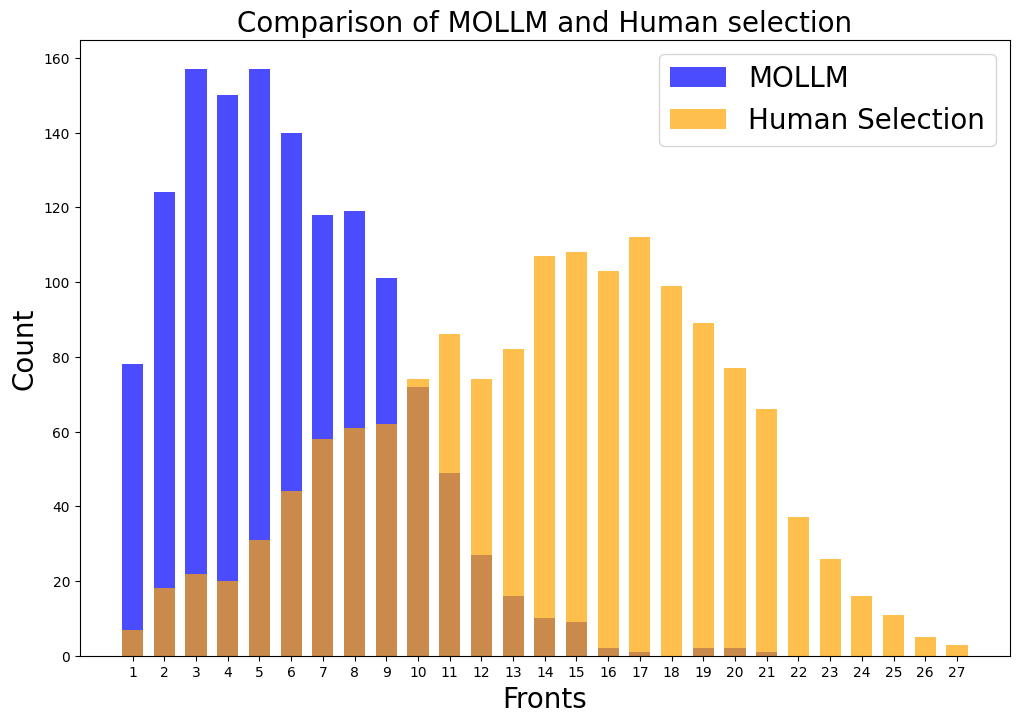

In [47]:
dividing = len(yue_best_moles)
print(f'dividing line {dividing}')
nians = []
yues = []
for front in fronts:
    nian_better = (np.array(front)>1497).sum()
    nians.append(nian_better)
    yue_better = len(front) - nian_better
    yues.append(yue_better)

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'nians' and 'yues' are already populated lists from your code
x = np.arange(len(nians)) * 1.5  # the label locations

width = 1  # the width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

# Both bars plotted at the same x positions
bars_nian = ax.bar(x, nians, width, label='MOLLM', color='blue', alpha=0.7)
bars_yue = ax.bar(x, yues, width, label='Human Selection', color='orange', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Fronts',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('Comparison of MOLLM and Human selection',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels([f'{i+1}' for i in range(len(nians))])  # Adjust labels as needed
ax.legend(fontsize=20)

# Displaying the plot
plt.show()



In [48]:
fronts0 = np.array(fronts[0])
all_moles = yue_best_moles + best_moles
# ['smarts_filter', 'logs', 'reduction_potential', 'sa']
len(yue_best_moles),len(best_moles),(fronts0>1497).sum(),fronts0.shape

(1497, 1336, 78, (85,))

In [49]:
with open("/home/v-nianran/src/MOLLEO/multi_objective/ini_smiles",'r') as f:
    a = f.readlines()
a = [i.replace('\n','') for i in a]
a

['CNS(=O)(=O)c1ccc(C(=O)N2C[C@@H](C)OCC2(C)C)cc1',
 'COc1cc(-c2cc(NCC[NH+](C)C)nc3[nH]ccc23)ccc1O',
 'O=C(Cc1csc(-c2cccc(F)c2)n1)N(Cc1ccccc1F)C1CC1',
 'CCCCN(C)C(=O)C1CCN(C(=O)[C@@H]2CCCN(S(=O)(=O)c3ccc(C)s3)C2)CC1',
 'Cc1cccc(NC(=O)CN2C(=O)N[C@](C)(c3cccc(Br)c3)C2=O)c1',
 'O=C(Nc1nc2c(s1)CCC[C@H]2C(=O)NCCc1ccccc1)c1ccc2c(c1)OCO2',
 'CCc1noc(CC)c1CC(=O)NCc1ncc(C)c(OC)c1C',
 'CCn1nc(C)c(C[NH+](C)Cc2cccc(OC(F)(F)F)c2)c1C',
 'c1coc([C@@H](C[NH2+]C[C@@H]2CNc3ccnn3C2)N2CCCC2)c1',
 'Cc1ccc(C)n1-c1ccc(Cl)c(N)c1',
 'CCOc1ccc2c(c1)sc(=S)n2CN1C[C@H](C)O[C@@H](C)C1',
 'NC(=O)[C@]1([NH2+]C2CC2)CCC[C@@H](OCC2CC2)C1',
 'CCO[C@@H]1C[C@@H](N(C)S(=O)(=O)c2cn(C)cn2)C12CCCC2',
 'CCCC(=O)N1CCC(C(=O)Nc2cccc(-c3nnnn3C)c2)CC1',
 'Cc1nn(-c2ccccc2F)c2ncc3c(c12)C(=O)N(c1ccc(Cl)c(C(F)(F)F)c1)C3=O',
 'Cc1ccc2nccc(Cl)c2c1',
 'Cc1ccc(C(=O)OC2CCC2)c(F)c1',
 'COC(=O)c1cccc(CCNC(=O)N2CCCN(CC(F)(F)F)CC2)c1',
 'C[C@@H](NC(=O)c1ccccc1)/C([O-])=N/c1nc(C(F)(F)F)n[nH]1',
 'Cn1cnc2ccc(NC(=O)c3ccc(=O)n(CC(=O)NC4CCCC4)c3)cc21'

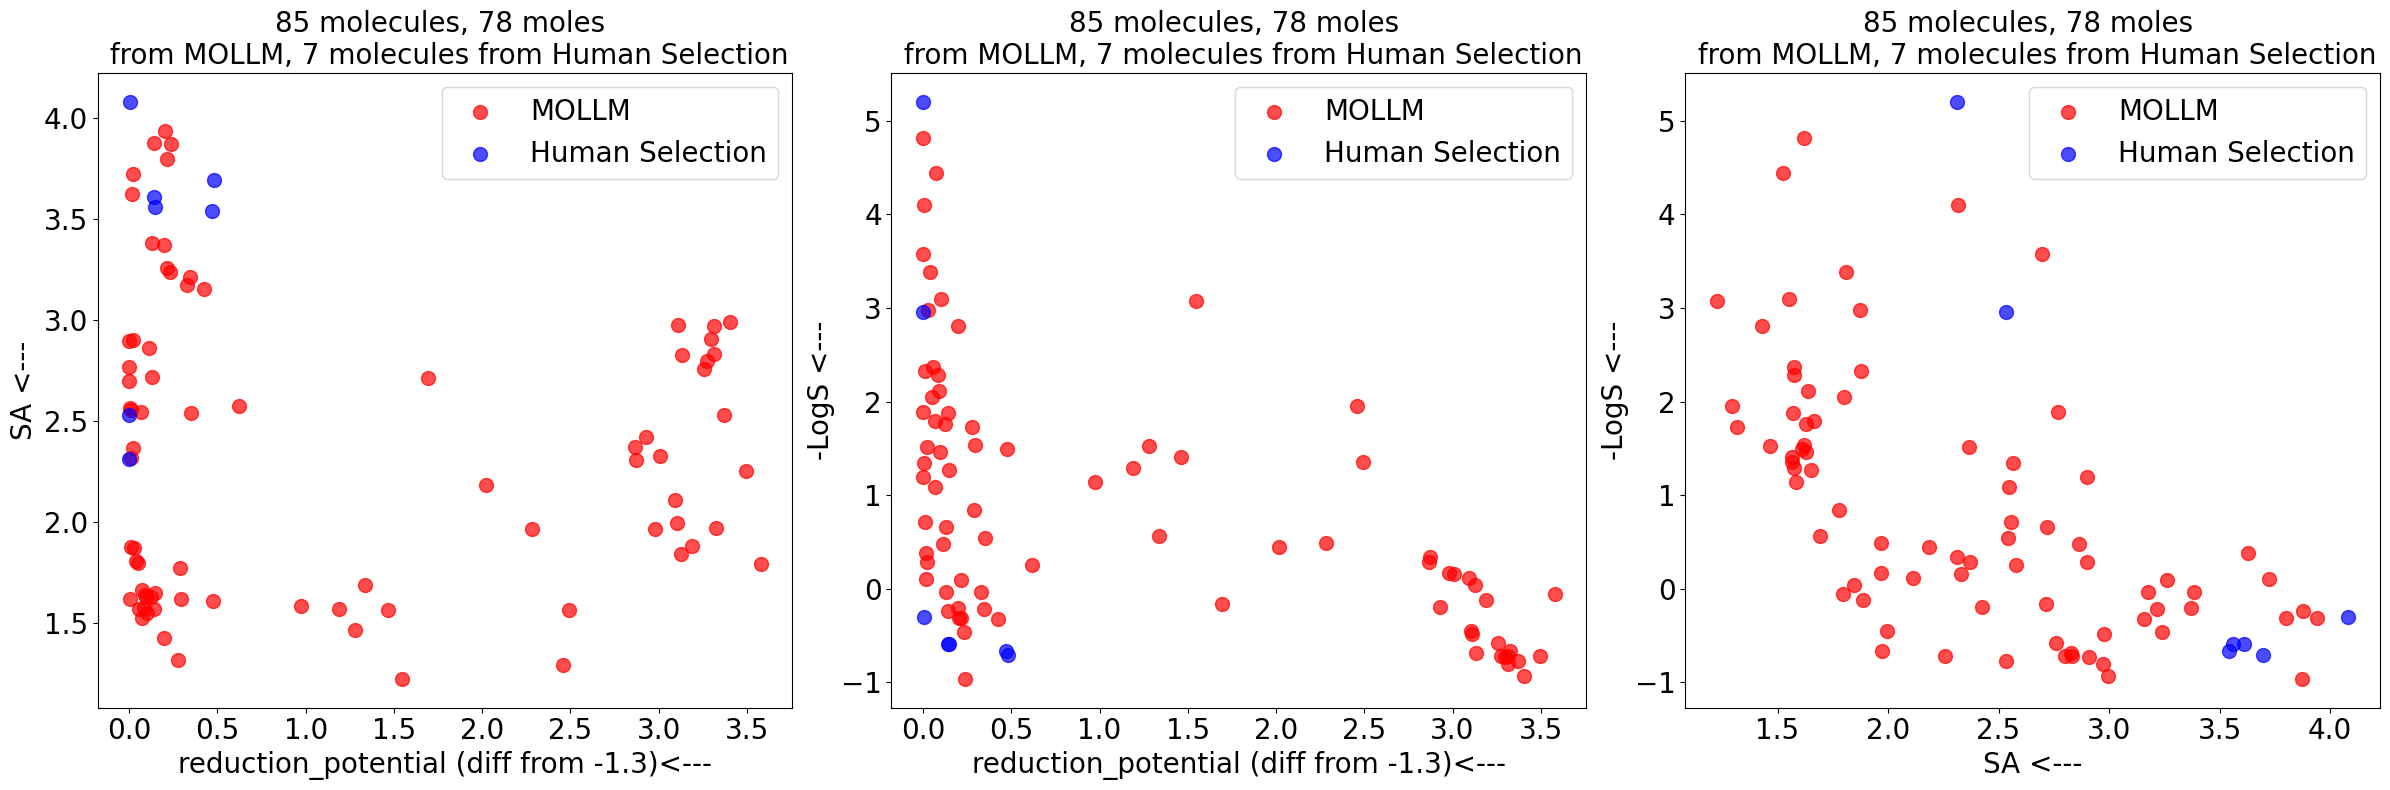

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def make_2dplot(ax, yue_smiles, pops, property1, property2, xlabel, ylabel):
    nian = []
    yue = []
    for p in pops:
        if property1 == 'reduction_potential':
            value1 = abs(p.property[property1] + 1.3)
        else:
            value1 = p.property[property1] 
        value2 = p.property[property2]
        if property2 == 'logs':
            value2 = -value2
        if p.value in yue_smiles:
            yue.append([value1, value2])
        else:
            nian.append([value1, value2])
    nian = np.stack(nian)
    ax.scatter(nian[:, 0], nian[:, 1], color='red', label="MOLLM", alpha=0.7, s=100)
    yue = np.stack(yue)
    ax.scatter(yue[:, 0], yue[:, 1], color='blue', label="Human Selection", alpha=0.7, s=100)
    
    # Set labels and legend for the current subplot
    fontsize = 20
    ax.set_xlabel(xlabel,fontsize = fontsize)
    ax.set_ylabel(ylabel,fontsize = fontsize)
    ax.legend(fontsize = fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_title(f'{len(pops)} molecules, {len(nian)} moles \n from MOLLM, {len(yue)} molecules from Human Selection',fontsize = fontsize)
fronts0_moles = [all_moles[i] for i in fronts0] 
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Adjust the figsize for appropriate spacing

# First plot
make_2dplot(axes[0], yue_best_moles_strings, fronts0_moles, 'reduction_potential', 'sa',
            'reduction_potential (diff from -1.3)<---', 'SA <---')

# Second plot
make_2dplot(axes[1], yue_best_moles_strings, fronts0_moles, 'reduction_potential', 'logs',
            'reduction_potential (diff from -1.3)<---', '-LogS <---')

# Third plot
make_2dplot(axes[2], yue_best_moles_strings, fronts0_moles, 'sa', 'logs',
            'SA <---', '-LogS <---')

# Show all subplots in one row
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


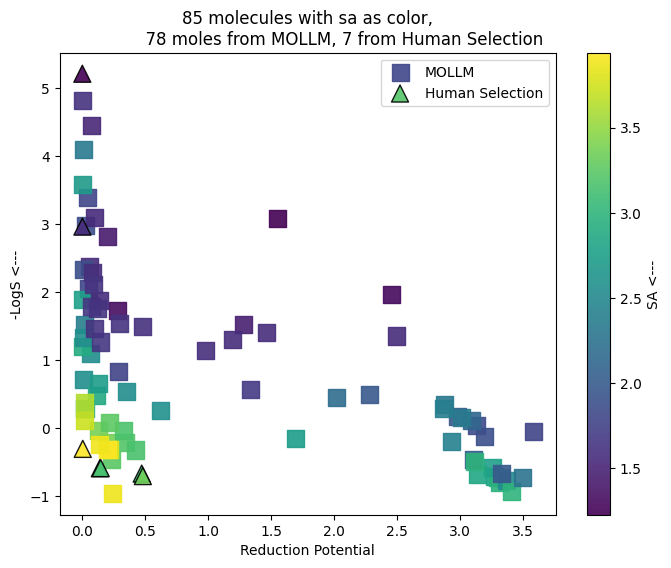

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def make_2dplot_with_colorbar(yue_smiles, pops, property1, property2, property3, xlabel, ylabel, cbar_label, cmap='plasma'):
    nian = []
    yue = []
    nian_values = []
    yue_values = []
    
    for p in pops:
        value1 = abs(p.property[property1] + 1.3)   # Reduction potential for color 
        value2 = -p.property[property2]  # Use negative of 'logs' for the x-axis
        value3 =  p.property[property3]  # SA for y-axis 
        
        if p.value in yue_smiles:
            yue.append([value1, value2])
            yue_values.append(value3)
        else:
            nian.append([value1, value2])
            nian_values.append(value3)
    
    # Convert to NumPy arrays for plotting
    nian = np.array(nian)
    yue = np.array(yue)
    nian_values = np.array(nian_values)
    yue_values = np.array(yue_values)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    
    # Scatter for nian's points
    scatter_nian = plt.scatter(nian[:, 0], nian[:, 1], c=nian_values,  marker='s', label="MOLLM", alpha=0.9, s=150)
    
    # Scatter for yue's points
    scatter_yue = plt.scatter(yue[:, 0], yue[:, 1], c=yue_values,edgecolor='black', marker='^', label="Human Selection", alpha=0.9, s=150)
    
    # Add color bar for the third property (reduction potential)
    cbar = plt.colorbar(scatter_nian)
    cbar.set_label(cbar_label)
    
    # Labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f'{len(pops)} molecules with {property3} as color,\n\
              {len(nian)} moles from MOLLM, {len(yue)} from Human Selection')
    
    # Show plot
    plt.show()

# Example usage
make_2dplot_with_colorbar(yue_best_moles_strings, fronts0_moles, 'reduction_potential','logs', 'sa',
                            'Reduction Potential','-LogS <---', 'SA <---', cmap='inferno')


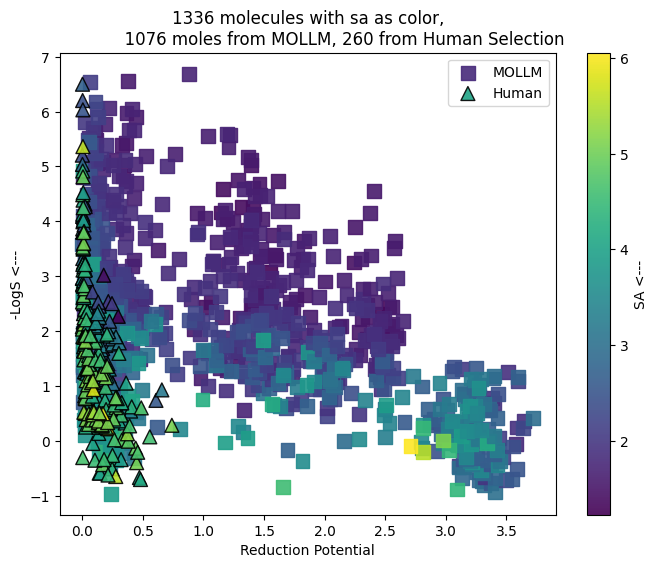

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def make_2dplot_with_colorbar(yue_smiles, pops, property1, property2, property3, xlabel, ylabel, cbar_label, cmap='plasma'):
    nian = []
    yue = []
    nian_values = []
    yue_values = []
    
    for p in pops:
        value1 = abs(p.property[property1] + 1.3)   # Reduction potential for color 
        value2 = -p.property[property2]  # Use negative of 'logs' for the x-axis
        value3 =  p.property[property3]  # SA for y-axis 
        
        
        if p.value in yue_smiles:
            yue.append([value1, value2])
            yue_values.append(value3)
        else:
            nian.append([value1, value2])
            nian_values.append(value3)
    
    # Convert to NumPy arrays for plotting
    nian = np.array(nian)
    yue = np.array(yue)
    nian_values = np.array(nian_values)
    yue_values = np.array(yue_values)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    
    # Scatter for nian's points
    scatter_nian = plt.scatter(nian[:, 0], nian[:, 1], c=nian_values,  marker='s', label="MOLLM", alpha=0.9, s=100)
    
    # Scatter for yue's points
    scatter_yue = plt.scatter(yue[:, 0], yue[:, 1], c=yue_values, edgecolor='black', marker='^', label="Human", alpha=0.9, s=100)
    
    # Add color bar for the third property (reduction potential)
    cbar = plt.colorbar(scatter_nian)
    cbar.set_label(cbar_label)
    
    # Labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f'{len(pops)} molecules with {property3} as color,\n\
              {len(nian)} moles from MOLLM, {len(yue)} from Human Selection')
    
    # Show plot
    plt.show()

# Example usage
make_2dplot_with_colorbar(yue_best_moles_strings, real_best, 'reduction_potential','logs', 'sa',
                            'Reduction Potential','-LogS <---', 'SA <---', cmap='inferno')


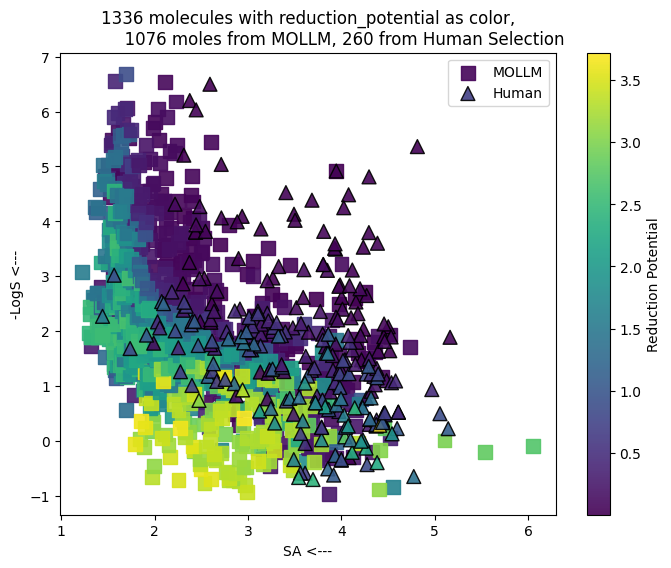

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def make_2dplot_with_colorbar(yue_smiles, pops, property1, property2, property3, xlabel, ylabel, cbar_label, cmap='plasma'):
    nian = []
    yue = []
    nian_values = []
    yue_values = []
    
    for p in pops:
        value1 = p.property[property1]  # SA for y-axis
        value2 = -p.property[property2]  # Use negative of 'logs' for the x-axis
        value3 = abs(p.property[property3] + 1.3)   # Reduction potential for color 
        
        
        if p.value in yue_smiles:
            yue.append([value1, value2])
            yue_values.append(value3)
        else:
            nian.append([value1, value2])
            nian_values.append(value3)
    
    # Convert to NumPy arrays for plotting
    nian = np.array(nian)
    yue = np.array(yue)
    nian_values = np.array(nian_values)
    yue_values = np.array(yue_values)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    
    # Scatter for nian's points
    scatter_nian = plt.scatter(nian[:, 0], nian[:, 1], c=nian_values,  marker='s', label="MOLLM", alpha=0.9, s=100)
    
    # Scatter for yue's points
    scatter_yue = plt.scatter(yue[:, 0], yue[:, 1], c=yue_values, edgecolor='black', marker='^', label="Human", alpha=0.9, s=100)
    
    # Add color bar for the third property (reduction potential)
    cbar = plt.colorbar(scatter_nian)
    cbar.set_label(cbar_label)
    
    # Labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f'{len(pops)} molecules with {property3} as color,\n\
              {len(nian)} moles from MOLLM, {len(yue)} from Human Selection')
    
    # Show plot
    plt.show()

# Example usage
make_2dplot_with_colorbar(yue_best_moles_strings, real_best, 'sa','logs', 'reduction_potential',
                           'SA <---', '-LogS <---',  'Reduction Potential', cmap='inferno')


## OpenAI o1

In [16]:
import pickle 
with open('/home/v-nianran/src/results/sa_drd2_qed_gsk3b_jnk3_best100_45.pkl','rb') as f:
    obj = pickle.load(f)
obj.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [12]:
from model.util import nsga2_selection
best100,fronts = nsga2_selection(obj['all_mols'],pop_size=100,return_fronts=True)

/home/v-nianran/src/MOLLM/model/util.py:54: RuntimeWarning: invalid value encountered in scalar divide
  distances[i] += (population[front[i + 1]].scores[m] - population[front[i - 1]].scores[m]) / (max(population[k].scores[m] for k in front) - min(population[k].scores[m] for k in front))


In [3]:
len(obj['all_mols'])

5031

In [21]:
import numpy as np
import pygmo as pg
points = []
for i in best100:
    points.append(i.scores)
points = np.stack(points)
hv_pygmo = pg.hypervolume(points)
hvc = hv_pygmo.contributions(np.array([1.0 for i in range(points.shape[1])]))
hvc.shape

(100,)

In [22]:
sorted_indices = np.argsort(hvc)[::-1]  # Reverse to sort in descending order

# Use the sorted indices to reorder the elements array
sorted_elements = [best100[i] for i in sorted_indices]
sorted_hvc = [hvc[i] for i in sorted_indices]
sorted_hvc

[0.01760863046947514,
 0.006409195388871414,
 0.003985256810662641,
 0.0031776489935841923,
 0.00225953845980964,
 0.0006585169672126412,
 0.00020571387265544416,
 0.0001996247877613655,
 0.00018070072935971737,
 0.0001783752653090609,
 0.0001113853607095372,
 0.00010665845517654482,
 9.168064168019185e-05,
 8.559573637167972e-05,
 5.333623297154588e-05,
 4.550600602604149e-05,
 3.115511071039023e-05,
 2.4358628181619935e-05,
 1.9392289968722665e-05,
 1.7847446368568498e-05,
 1.562178561576033e-05,
 1.2975224673805741e-05,
 1.1945354622344695e-05,
 1.0903570770048887e-05,
 8.948000637776232e-06,
 8.378620131477277e-06,
 6.242307180270856e-06,
 4.594059906271042e-06,
 4.591552790200737e-06,
 3.724012796135767e-06,
 2.584335194510956e-06,
 1.6320387217216847e-06,
 9.314867672749472e-07,
 8.744863131404657e-07,
 2.071794331648391e-07,
 1.0635447145190824e-07,
 7.17061376942496e-08,
 6.020009646334756e-08,
 6.004598240849646e-08,
 5.4612523170405325e-08,
 3.73819295518274e-08,
 2.916528596

In [23]:
total = 0
for i in sorted_elements[:10]:
    print(i.total)
    total += i.total
total / 10

3.856239262725304
4.0784895833554975
4.371988782012521
4.537900263729825
4.1776544562243725
4.128156122730154
4.219638173513792
3.9233425568993785
4.209416805515742
3.8874474743055174


4.1390273481012105

In [15]:
from model.util import nsga2_selection
_,fronts = nsga2_selection(obj['all_mols'],pop_size=2,return_fronts=True)

/home/v-nianran/src/MOLLM/model/util.py:54: RuntimeWarning: invalid value encountered in scalar divide
  distances[i] += (population[front[i + 1]].scores[m] - population[front[i - 1]].scores[m]) / (max(population[k].scores[m] for k in front) - min(population[k].scores[m] for k in front))


In [24]:
obj['all_mols'][0].scores

array([ 0.22606359,  0.00165383, -0.92032723,  0.        , -0.55      ])

In [28]:
for i in sorted(obj['all_mols'], key=lambda item: item.total, reverse=True)[:10]:
    print(i.total,i.value)

4.698537399143344 COC(=O)c1c(C)csc1NC(=O)Cc1ccc(OC)cc1
4.698537399143344 COC(=O)c1c(C)csc1NC(=O)Cc2ccc(OC)cc2
4.578723213056962 COC(=O)c1c(C)csc1NC(=O)Cc1ccc(C)cc1
4.578723213056962 COC(=O)c1c(C)csc1NC(=O)Cc2ccc(C)cc2
4.537900263729825 CN(C)C(=O)c1c(C)csc1NC(=O)Cc2ccc(OC)cc2
4.537900263729825 CN(C)C(=O)c1c(C)csc1NC(=O)Cc1ccc(OC)cc1
4.537279824526943 COC(=O)c1c(C)csc1NC(=O)Cc1ccc(O)cc1
4.537279824526943 COC(=O)c1c(C)csc1NC(=O)Cc2ccc(O)cc2
4.525776451136649 COC(=O)c1c(C)csc1NC(=O)Cc2ccc(CO)cc2
4.518770264549688 COC(=O)c1c(C)csc1NC(=O)Cc1ccc(Cl)cc1


In [39]:
import numpy as np
import pygmo as pg
best_idx = fronts[0]
best_moles = []
points = []
for i in best_idx:
    points.append(obj['all_mols'][i].scores)
    best_moles.append(obj['all_mols'][i])
points = np.stack(points)
best_moles = np.array(best_moles)
points.shape

(365, 5)

In [40]:
hv_pygmo = pg.hypervolume(points)
hvc = hv_pygmo.contributions(np.array([1.0 for i in range(points.shape[1])]))
hvc.shape

(365,)

In [42]:
sorted_indices = np.argsort(hvc)[::-1]  # Reverse to sort in descending order

# Use the sorted indices to reorder the elements array
sorted_elements = [best_moles[i] for i in sorted_indices]
sorted_hvc = [hvc[i] for i in sorted_indices]
sorted_hvc


[0.01760863046947514,
 0.004085674548057749,
 0.0019236186886009143,
 0.0005563038862335112,
 0.0005244705594695809,
 0.00020293814126937093,
 0.00018069826819422374,
 0.0001781897184547354,
 0.00014045633140158387,
 0.00010997211371654991,
 0.00010665845517654482,
 6.766967447902061e-05,
 6.147080326313059e-05,
 4.363847479549321e-05,
 3.6646392581829446e-05,
 3.124819803357326e-05,
 2.047551835016037e-05,
 1.9512362214646473e-05,
 1.928865584854833e-05,
 1.915522735296271e-05,
 1.7071250746569788e-05,
 1.5493762185458948e-05,
 1.4260858735681836e-05,
 1.2528410948231539e-05,
 1.1556065072415578e-05,
 1.1145134256818068e-05,
 1.1140414074350957e-05,
 1.0372413861814422e-05,
 1.0360240670914678e-05,
 9.637056755495976e-06,
 8.988121022790452e-06,
 8.947427068140001e-06,
 7.473946651348484e-06,
 6.725832714993274e-06,
 6.13821567729822e-06,
 5.348154477502476e-06,
 4.722673080603812e-06,
 4.612990826657892e-06,
 4.328019939769945e-06,
 4.2160928983570045e-06,
 3.6052115686135977e-06,
 2

In [43]:
for i in sorted_elements:
    print(i.total,i.property)

3.856239262725304 {'sa': 1.1682590465187346, 'drd2': 8.472171937046483e-05, 'qed': 0.8750194340578672, 'gsk3b': 0.0, 'jnk3': 0.0}
4.078050669091898 {'sa': 1.442130397738243, 'drd2': 0.00047191243445402056, 'qed': 0.7576481812750451, 'gsk3b': 0.01, 'jnk3': 0.38}
4.1776544562243725 {'sa': 1.624993686857085, 'drd2': 0.00044709942913924384, 'qed': 0.7475452986376329, 'gsk3b': 0.01, 'jnk3': 0.51}
4.371988782012521 {'sa': 2.1597672033406035, 'drd2': 0.00023806238797898085, 'qed': 0.9410898669939001, 'gsk3b': 0.01, 'jnk3': 0.57}
3.900714459415524 {'sa': 1.3542581742937472, 'drd2': 4.062538747570926e-05, 'qed': 0.8901171041689717, 'gsk3b': 0.0, 'jnk3': 0.05}
4.219638173513792 {'sa': 1.7546541264175275, 'drd2': 0.00022310709464520853, 'qed': 0.793711739099273, 'gsk3b': 0.01, 'jnk3': 0.52}
4.209416805515742 {'sa': 1.8469411651940302, 'drd2': 0.0002136899604414327, 'qed': 0.7937350693866313, 'gsk3b': 0.02, 'jnk3': 0.53}
3.8874474743055174 {'sa': 1.2621774169421407, 'drd2': 0.00017814492021087224,

In [19]:
type(obj['final_pops'][0])

algorithm.base.Item

In [84]:
def extract_smiles_from_string(text):
    pattern = r"<mol>(.*?)</mol>"
    smiles_list = re.findall(pattern, text)
    return smiles_list
with open('/home/v-nianran/src/MOLLM/o1_answers.txt','r') as f:
    o1 = f.readlines()
smiles = []
for line in o1:
    if '<mol>' in line:
        smiles.extend(extract_smiles_from_string(line))
smiles


['Cc1cc(O)cc(C(N)=[NH2+])c1',
 'Oc1ccc(N)cc1',
 'Oc1cc(O)ccc1N',
 'CNc1ccc(O)cc1',
 'Cc1ccc(N)cc1',
 'O=C(O)c1ccc(C#N)cc1',
 'O=C(O)c1ccc(Cl)cc1',
 'O=S(=O)(O)c1ccccc1',
 'Oc1ccc(C=O)cc1',
 'O=C(N)c1ccc(O)cc1',
 'O=C(O)c1ccncc1',
 'O=C(O)c1ncccc1',
 'O=C(O)c1ccc(F)cc1',
 'O=C(O)c1ccc(C(F)(F)F)cc1',
 'O=C(O)c1ccccc1',
 'NCC(=O)O',
 'NC(=O)N',
 'NC(=O)C(=O)N',
 'NCCN',
 'NC(=N)N',
 'OCCN',
 'OCCCN',
 'CC(O)CN',
 'CC(N)CO',
 'NCC(O)CO',
 'Oc1ccncc1',
 'O=C(O)c1ccncc1',
 'Nc1ccncc1',
 'Cc1ccncc1',
 'c1ccncc1',
 'O=C(O)C(=O)O',
 'O=C(O)CC(=O)O',
 'O=C(O)C(O)C(=O)O',
 'O=C(O)C(O)C(O)C(=O)O',
 'O=C(O)C(N)C(=O)O',
 'CC(=O)O',
 'CC(O)C(=O)O',
 'CC(=O)C(=O)O',
 'OCCO',
 'OCC(O)CO',
 'O=C(NCCO)c1ccccc1',
 'O=C(NCCO)c1ccc(O)cc1',
 'O=C(NCCO)c1ccc(C#N)cc1',
 'O=C(NCCO)c1ccc(N)cc1',
 'O=C(NCCO)C#N',
 'O=C(O)c1cccnc1',
 'O=C(O)c1ccncc1F',
 'O=C(O)c1ccc(Br)cc1',
 'O=C(O)C=C',
 'O=C(O)C=C(O)C(=O)O',
 'CO',
 'CCO',
 'OCC(O)CO',
 'CC(=O)N',
 'C(=O)N',
 'N#CCC(=O)O',
 'O=C(O)CCN',
 'O=C(O)CC(=O)O',
 'O=C(

In [87]:
from model.util import nsga2_selection
import pickle
with open('data/o1_300.pkl','rb') as f:
    o1 = pickle.load(f)
len(o1)

60

In [88]:
best_o1 = []
for p in o1:
    if p.property['smarts_filter'] == 0:
        best_o1.append(p)
len(best_o1)

4

In [89]:
len(yue_best_moles)

1497

In [92]:
o1_real_best, o1_fronts = nsga2_selection(best_o1+yue_best_moles,pop_size=300,return_fronts=True)
len(o1_fronts)

20

In [95]:
for i in best_o1:
    print(i.raw_scores)

[ 0.         -1.06059504 -1.16068995  3.15930325]
[ 0.          0.86871791 -4.52492237  2.69095382]
[ 0.          0.47386837 -2.80149126  2.91568855]
[ 0.         -0.2950325  -1.66992557  2.66740004]


In [93]:
o1_fronts[0]

[1,
 2,
 3,
 108,
 255,
 258,
 273,
 315,
 323,
 374,
 394,
 432,
 440,
 464,
 469,
 499,
 506,
 547,
 548,
 561,
 586,
 587,
 671,
 696,
 718,
 740,
 755,
 847,
 895,
 914,
 945,
 957,
 967,
 1051,
 1124,
 1144,
 1147,
 1159,
 1217,
 1419,
 1421,
 1477,
 1486]

## Make new fair dataset

In [11]:
import pickle
with open('/home/v-nianran/src/MOLLM/data/zinc250_5goals.pkl', 'rb') as f:
    data = pickle.load( f)
data.keys()

dict_keys(['all'])

In [14]:
items = data['all']
items = sorted(items, key=lambda i:i.total , reverse=True)
len(items)

249455

In [16]:
best500 = items[:500]
worst500 = items[-500:]
for i in best500[:10]:
    print(i.total)
for i in worst500[-10:]:
    print(i.total)

4.328602743122063
4.1776544562243725
4.174157800173173
4.142351965277608
4.108456201139896
4.107295728827515
4.089593732865093
4.069220413168561
4.062465990193266
4.061696143102486
2.4987860571736387
2.487580347274609
2.46641306611768
2.434380901167742
2.427002699787757
2.40124313525289
2.387403172477981
2.3777280548148854
2.3548741949375374
2.349536238488605


In [17]:
data = {
        'all':items,
        'best500':best500,
        'worst500':worst500,
    }
filepath = '/home/v-nianran/src/MOLLM/data/zinc250_5goals.pkl'
with open(filepath, 'wb') as f:
    pickle.dump(data, f)
print(f"Data saved to {filepath}")

Data saved to /home/v-nianran/src/MOLLM/data/zinc250_5goals.pkl


## Old dataset for material science

In [30]:
with open('/home/v-nianran/src/MOLLM/data/best300.pkl', 'rb') as f:
    data = pickle.load( f)
data.keys()

dict_keys(['best300', 'all'])

In [29]:
import pandas as pd
from model.util import nsga2_selection
with open('/home/v-nianran/src/MOLLM/data/best300.pkl', 'rb') as f:
    old_data = pickle.load( f)
items = old_data['all']
good_items = []
for i in items:
    if i.property['smarts_filter'] == 0:
        good_items.append(i)
print('good items',len(good_items))
#moo.evaluate_all(items)
best300 = nsga2_selection(good_items,300)
filepath = 'data/best300.pkl'
import pickle
def save_to_pkl( filepath):
    data = {
        'best300':best300,
        'all':items
    }
    with open(filepath, 'wb') as f:
        pickle.dump(data, f)
    print(f"Data saved to {filepath}")
save_to_pkl(filepath)

good items 1497
Data saved to data/best300.pkl


In [31]:
good  = 0
for i in data['best300']:
    if i.property['smarts_filter'] == 0:
        good +=1
good

300

In [36]:
best300_scores = []
for i in data['best300']:
    best300_scores.append(i.raw_scores)
best300_scores = np.stack(best300_scores)
best300_scores.mean(axis=0)

array([ 0.        , -2.24571357, -1.2908068 ,  3.19977587])

In [34]:
all_scores = []
for i in data['all']:
    all_scores.append(i.raw_scores)
all_scores = np.stack(all_scores)
all_scores.mean(axis=0)

array([ 0.23661397, -3.57490942, -1.40573195,  3.45099333])

In [37]:
bad_smiles = [i.value for i in data['best300']]
bad_smiles = [f"<mol>{i}</mol>" for i in bad_smiles]
data = {
    'prompts':bad_smiles,
    'requirements':[
        {'sa_requ': {
            'property': 'sa',
            'requirement': 'decrease'
        },
        'reduction_potential_requ': {
            'property': 'reduction_potential',
            'requirement': 'towards, -1.3'
        },
        'logs_requ': {
            'property': 'logs',
            'requirement': 'increase'
        },
        'smarts_filter_requ': {
            'property': 'smarts_filter',
            'requirement': 'equal, 0'
        }} for i in range(len(bad_smiles))
    ]
}
json_file_path = 'data/yue300.json'

with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

## make previous dataset chem300.json

In [20]:
import json
with open("bad_smiles_chem.json", "r") as f:
    bad_smiles = json.load( f)
len(bad_smiles),bad_smiles[:10]

(300,
 ['Cc1ccccc1[C@@H](NC(=O)c1cnc([C@H]2CCCO2)s1)C(C)C',
  'C1CC[NH2+][C@@](C2CC2)([C@@H]2CCOC3(CCC3)C2)CC1',
  'Cc1ccc(NC(=O)C[C@H]2SC([N-]c3ccc(N(C)C)cc3)=NC2=O)c(C)c1',
  'COC[C@@H](C)[NH+]1CCN(CC2=Cc3ccccc3OC2)CC1',
  'O=C(CSc1nc2ccccc2o1)N1N=C(c2cccs2)C[C@@H]1c1cccs1',
  'O=C(c1ccn2cncc2c1)N1CC[C@H](Oc2cccc(Cl)c2)C1',
  'CC(C)(C)Oc1cc(CNC(=O)NC[C@@H](O)C(C)(C)C)ccn1',
  'C[NH+]1CCC(C[NH+](C)C2CCC(c3ccc(O)cc3)CC2)CC1',
  'CC(C)N(C)C(=O)N[C@@H]1CCC[C@H](C)C1',
  'CC(C)C[C@H]1CCCCC[NH+]1CCC(=O)Nc1ccc(C(N)=O)cc1'])

sa 1.5960526085782512 6.649504345814619   min
reduction_potential -4.990693092346191 -0.9798483848571777    to -1.3
smarts_filter 0.0 1.0    # 0 pass
logs -7.43935489654541 0.47240304946899414 # max

In [21]:
bad_smiles = [f"<mol>{i}</mol>" for i in bad_smiles]
data = {
    'prompts':bad_smiles,
    'requirements':[
        {'sa_requ': {
            'property': 'sa',
            'requirement': 'decrease'
        },
        'reduction_potential_requ': {
            'property': 'reduction_potential',
            'requirement': 'range, -2.3, -0.3'
        },
        'logs_requ': {
            'property': 'logs',
            'requirement': 'increase'
        },
        'smarts_filter_requ': {
            'property': 'smarts_filter',
            'requirement': 'equal, 0'
        },
        'similarity_requ': {
            'property': 'similarity',
            'requirement': 'increase'
        },} for i in range(len(bad_smiles))
    ]
}
json_file_path = 'data/chem300.json'

with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

In [4]:
import pandas as pd
smarts = pd.read_csv('/home/v-nianran/src/MOLLM/yue/smarts_filters.csv')
for index,row in smarts.iterrows():
    print('"'+row['description']+': '+row['smarts']+'"')

"reactive alkyl halides: [Br,Cl,I][CX4;CH,CH2]"
"acid halides: [S,C](=[O,S])[F,Br,Cl,I]"
"carbazides: O=CN=[N+]=[N-]"
"sulphate esters: COS(=O)O[C,c]"
"sulphonates: COS(=O)(=O)[C,c]"
"acid anhydrides: C(=O)OC(=O)"
"peroxides: OO"
"pentafluorophenyl esters: C(=O)Oc1c(F)c(F)c(F)c(F)c1(F)"
"esters of HOBT: C(=O)Onnn"
"isocyanates & isothiocyanates: N=C=[S,O]"
"triflates: OS(=O)(=O)C(F)(F)F"
"lawesson's reagent and derivatives: P(=S)(S)S"
"phosphoramides: NP(=O)(N)N"
"aromatic azides: cN=[N+]=[N-]"
"acylhydrazide: [N;R0][N;R0]C(=O)"
"quaternary C, Cl, I, P or S: [C+,Cl+,I+,P+,S+]"
"phosphoranes: C=P"
"chloramidines: [Cl]C([C&R0])=N"
"nitroso: [N&D2](=O)"
"P/S Halides: [P,S][Cl,Br,F,I]"
"carbodiimide: N=C=N"
"isonitrile: [N+]#[C-]"
"triacyloximes: C(=O)N(C(=O))OC(=O)"
"cyanohydrins: N#CC[OH]"
"acyl cyanides: N#CC(=O)"
"sulfonyl cyanides: S(=O)(=O)C#N"
"cyanophosphonates: P(OCC)(OCC)(=O)C#N"
"azocyanamides: [N;R0]=[N;R0]C#N"
"azoalkanals: [N;R0]=[N;R0]CC=O"
"epoxides, thioepoxides, aziridine

## Test and Tutorial

In [20]:
mollm = MOLLM()

In [32]:
## test initialization
mol = 'CCH'
mollm.moo.init_mol_dataset()
init_pops = mollm.moo.generate_initial_population(mol,10)
for i in init_pops:
    print(i.value)

Found local copy...
Loading...
Done!


Loading ZINC dataset...
CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1
CC[NH+](CC)[C@](C)(CC)[C@H](O)c1cscc1Br
O=C(Nc1nc[nH]n1)c1cccnc1Nc1cccc(F)c1
Cc1c(/C=N/c2cc(Br)ccn2)c(O)n2c(nc3ccccc32)c1C#N
C[C@@H]1CN(C(=O)c2cc(Br)cn2C)CC[C@H]1[NH3+]
CCOc1ccc(OCC)c([C@H]2C(C#N)=C(N)N(c3ccccc3C(F)(F)F)C3=C2C(=O)CCC3)c1
Cc1ccccc1C(=O)N1CCC2(CC1)C[C@H](c1ccccc1)C(=O)N2C
CCCc1cc(NC(=O)CN2C(=O)NC3(CCC(C)CC3)C2=O)n(C)n1
CCH


In [33]:
## test evaluation in MOO
mollm.moo.requirement_meta['donor_num'] = 1
mollm.moo.evaluate_all(init_pops)

In [34]:
## test generation offspring
prompt = 'How can we modify the molecule  to decrease its logP value? and still for this molecule Consider a molecule with the SMILES string . Propose changes that could increase its QED value by at least 0.1 compared to the pre-optimized value to make it more drug-like. and still for this molecule  Support me in transforming the molecule  by incorporating the same hydrogen bond donors. This molecule is <mol>CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(O)CCl)C1)Nc1nc(-c2ccc(C=N)c(N)c2)cn2ccnc12</mol>'
offs = mollm.moo.generate_offspring(init_pops, prompt, 2)
offs

In [35]:
for i in offs:
    print(i.value)

CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(O)C(Cl)CCl)C1)Nc1nc(-c2ccc(C=N)c(N)c2)cn2ccnc12
CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(O)C(O)N1)Nc1nc(-c2ccc(C=N)c(N)c2)cn2ccnc12
CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(O)C(=O))C1)Nc1nc(-c2ccc(C=N)c(N)c2)cn2ccnc12
CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(OH)CCl)C1)Nc1nc(-c2ccc(C=N)c(F)c2)cn2ccnc12


In [37]:
## test selection next generation
next_gen = mollm.moo.select_next_population(init_pops, offs, 3)
for i in next_gen:
    print(i.scores)

[-0.82714972]
[-0.82237984]
[-0.81871365]


In [ ]:
## overall 
mollm.moo.run

In [16]:
import json
prompts = ['<mol>CCH</mol>']
requs = [{'qed_requ': {
  'property': 'QED',
  'requirement': 'increase'},
  'drd2_requ': {
    'property': 'DRD2',
    'requirement': 'decrease'},
  'sa_requ': {
    'property': 'SA',
    'requirement': 'decrease'},
  'gsk3b_requ': {
    'property': 'GSK3β',
    'requirement': 'decrease'},
  'jnk3_requ': {
    'property': 'JNK3',
    'requirement': 'increase'},
 }]
data = {
    'prompts':prompts,
    'requirements':requs
}
json_file_path = 'data/goals5.json'

with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

## make dataset

In [15]:
import pandas as pd
donor_df = pd.read_csv('/home/v-nianran/src/data/dpo_donor_test.csv')
qed_df = pd.read_csv('/home/v-nianran/src/data/dpo_qed_test.csv')
logp_df = pd.read_csv('/home/v-nianran/src/data/dpo_logp_test.csv')

def extract_smiles_from_string(text):
    pattern = r"<mol>(.*?)</mol>"
    smiles_list = re.findall(pattern, text)
    return smiles_list
num = 50
df = pd.concat([logp_df.iloc[:num],qed_df.iloc[num:num*2],donor_df.iloc[num*2:num*3]])
moles = [extract_smiles_from_string(p)[0] for p in df.prompt]
moles

['CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1',
 'CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(O)CCl)C1)Nc1nc(-c2ccc(C=N)c(N)c2)cn2ccnc12',
 'CCOc1cc(C)ccc1Cn1c(-c2cccc(C)n2)nnc1N1CCN(S(C)(=O)=O)[C@@H](C)C1',
 'CCC1Cc2c(nn(-c3ccc4ccccc4c3)c2-c2cc(Cl)cc(Cl)c2)C(CC)N1C(=O)c1cccc(-n2cnnc2)c1',
 'CC1Oc2ccc(-c3cn4ccsc4n3)cc2N(C(Cc2cccs2)C(CCl)C(=O)c2ccc(-c3ccccc3)cc2)C1=O',
 'Cc1cccc(C2CCCCCN2S(=O)(=O)c2cccc3nsnc23)c1',
 'CCC(C)=C(CC)CCC(=O)NC1CCN(C2CCN(C(=O)[C@H]3CC[C@H](C(=O)OC)C3)CC2)CC1',
 'CCCc1ccc(-c2ccc([C@H](O)C[C@H]3CCCN3C[C@@H]3CCC4(CCCC4)O3)cc2)s1',
 'CC(C)(C)c1nc([NH2+]c2nc(Nc3ccc4c(c3)CNCC4(C)C)ncc2C(O)NC2CC2)cs1',
 'CCc1cc2c(CN3CCN(C(=O)c4cccs4)CC3)cc(=O)oc2cc1-c1c(C)cc(C)cc1C',
 'COc1cc(C(=O)OCCN2CCO[C@H](C)C2)ccc1[N+](=O)[O-]',
 'CCOc1ccccc1CCCNC(=O)c1ccccc1SCc1ccccc1',
 'O=C(CCc1ccc[nH]1)N1CC[C@]2(C1)CN(C(=O)C1=COCC1)CCN2C(=O)Oc1c(Cl)cc(-c2ccccc2)cc1Cl',
 'O=C(CCCCN1CCCCCC1)c1ccc2nc(Cc3ccccc3)c(=O)n(Cc3ccc(F)cc3)c2n1',
 'C[C@@H](F)CCN1CC[C@

In [16]:
combine_prompt = []
for index,mol in enumerate(moles):
    new_p = re.sub(r'<mol>.*?</mol>', '', logp_df.prompt[index]) + ' and still for this molecule ' +  \
        re.sub(r'<mol>.*?</mol>', '', qed_df.prompt[index]) + ' and still for this molecule  ' +\
        re.sub(r'<mol>.*?</mol>', '', donor_df.prompt[index]) + f' This molecule is <mol>{mol}</mol>'
    combine_prompt.append(new_p)
len(combine_prompt),combine_prompt[1]

(150,
 'How can we modify the molecule  to decrease its logP value? and still for this molecule Consider a molecule with the SMILES string . Propose changes that could increase its QED value by at least 0.1 compared to the pre-optimized value to make it more drug-like. and still for this molecule  Support me in transforming the molecule  by incorporating the same hydrogen bond donors. This molecule is <mol>CC=C(C=CC(=C(C)CC)N1CCOC(C(Cc2cccs2)C(O)CCl)C1)Nc1nc(-c2ccc(C=N)c(N)c2)cn2ccnc12</mol>')

In [17]:
import json
with open('/home/v-nianran/src/data/test_qed.metadata.json','r') as f:
    qed_meta = json.load(f)
with open('/home/v-nianran/src/data/test_logp.metadata.json','r') as f:
    logp_meta = json.load(f)
with open('/home/v-nianran/src/data/test_donor.metadata.json','r') as f:
    donor_meta = json.load(f)
qed_meta[80],logp_meta[80],donor_meta[80]

({'source_smiles': 'CC(Cc1cncc(Br)c1)c1ccc(CC(=O)N2C[C@@H]3COC[C@H](C2)[C@@H]3NC(=O)c2cc3c(n2C)-c2ncccc2OC3)nc1',
  'reference_smiles': 'Cn1c(C(=O)N[C@H]2[C@@H]3COC[C@H]2CN(C(=O)Cc2ccc(O)cn2)C3)cc2c1-c1ncccc1OC2',
  'property': 'QED',
  'requirement': 'increase'},
 {'source_smiles': 'C=C(C)C(c1ccccc1OCc1cccc(C(=O)NC(C)c2cccc(Br)c2)c1)C(C)(F)Br',
  'reference_smiles': 'CC(NC(=O)c1cccc(COc2ccccc2C(N)=O)c1)c1cccc(Br)c1',
  'property': 'logP',
  'requirement': 'range, 4, 5'},
 {'source_smiles': 'CC(C)(C)c1cc(C(N)=[NH+]O)ccc1C(=O)NN1CC(C(=O)OCC(=O)c2ccc(Cl)cc2Cl)CC1=O',
  'reference_smiles': 'CC(C)(C)c1ccc(C(=O)NN2CC(C(=O)OCC(=O)c3ccc(Cl)cc3Cl)CC2=O)cc1',
  'property': 'donor',
  'requirement': 'decrease, >=2'})

In [18]:
data = {
    'prompts':combine_prompt,
    'requirements':[
        {'qed_requ': qed_meta[i],
        'logp_requ': logp_meta[i],
        'donor_requ': donor_meta[i]} for i in range(len(combine_prompt))
    ]
}
json_file_path = 'data/uniform150_test.json'

with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

In [19]:
with open(json_file_path, 'r') as json_file:
    new_data = json.load(json_file,)
new_data['requirements'][0]

{'qed_requ': {'source_smiles': 'O=C([C@H]1CCCC[C@H]1N1CCCC1=O)N1CC2(CC(F)C2)C1',
  'reference_smiles': 'NNC(=O)C(=O)NC1CC2(C1)CN(C(=O)[C@H]1CCCC[C@H]1N1CCCC1=O)C2',
  'property': 'QED',
  'requirement': 'decrease'},
 'logp_requ': {'source_smiles': 'CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1',
  'reference_smiles': 'COc1ccc([C@@H](O)C(=O)N[C@H]2[C@@H]3COC[C@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1',
  'property': 'logP',
  'requirement': 'range, 2, 3'},
 'donor_requ': {'source_smiles': 'O=C(NC[C@H]1CCOc2ccccc21)c1ccc(F)c(C(F)(F)F)c1',
  'reference_smiles': 'CC(C)C[NH+](CC(=O)[O-])C(F)(F)c1cc(C(=O)NC[C@H]2CCOc3ccccc32)ccc1F',
  'property': 'donor',
  'requirement': 'increase'}}

In [54]:
len(new_data['prompts'])

150

## Experiments

In [24]:
mollm = MOLLM('config/base.yaml')
mollm.run()

Found local copy...
Loading...
Done!


Loading ZINC dataset...


  0%|          | 0/3 [00:00<?, ?it/s]

Suggest new molecules based on molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol> and help me decrease the QED value.I have some molecules with their objective values. <mol>CCn1cc(NC(=O)C2CCN(C(=O)CCc3ccccc3Cl)CC2)cn1</mol>,qed:0.8245023098421231,  
<mol>COC(=O)[C@@H](c1ccccc1Cl)N1CCN(C(=O)CCc2ccccc2Cl)CC1</mol>,qed:0.6444932819174114,  
 Give me two new molecules that are different from all points above, and not dominated by any of the above. You can do it by applying crossover on the points I give to you. Please note when you try to achieving these objectives, the molecules given you propose should be similar to the original molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol>. Do not write code. Do not give any explanation. Each output new molecule must start with <mol> and end with </mol> in SIMLE form
Suggest new molecules based on molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=

 33%|███▎      | 1/3 [00:03<00:06,  3.48s/it]

Suggest new molecules based on molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol> and help me decrease the QED value.I have some molecules with their objective values. <mol>CCCCC(CC)COCOc1ccc(C(=O)NC2CCC3C(COc3ccccc3Cl)CCC2C3)cc1</mol>,qed:0.229442435633374,  
<mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol>,qed:0.21636799460509812,  
 Give me two new molecules that are different from all points above, and not dominated by any of the above. You can do it by applying crossover on the points I give to you. Please note when you try to achieving these objectives, the molecules given you propose should be similar to the original molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol>. Do not write code. Do not give any explanation. Each output new molecule must start with <mol> and end with </mol> in SIMLE form
Suggest new molecules based on m

 67%|██████▋   | 2/3 [00:06<00:03,  3.30s/it]

Suggest new molecules based on molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol> and help me decrease the QED value.I have some molecules with their objective values. <mol>CCCCC(CC)COCOc1ccc([C@@H](CO)C(=O)N[C@@H]2CCC3C(COc3ccccc3Cl)CCC2C3)cc1</mol>,qed:0.18847463002625045,  
<mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol>,qed:0.21636799460509812,  
 Give me two new molecules that are different from all points above, and not dominated by any of the above. You can do it by applying crossover on the points I give to you. Please note when you try to achieving these objectives, the molecules given you propose should be similar to the original molecule <mol>CCCCC(CC)COCOc1ccc([C@@H](O)C(=O)N[C@@H]2[C@H]3COC[C@@H]2CN(C(=O)CCc2ccccc2Cl)C3)cc1</mol>. Do not write code. Do not give any explanation. Each output new molecule must start with <mol> and end with </mol> in SIMLE form
Suggest new mol

 67%|██████▋   | 2/3 [00:08<00:04,  4.26s/it]


KeyboardInterrupt: 

### One time experiment

In [10]:
from model.LLM import LLM
from algorithm.base import Item
from MOLLM.algorithm.PromptTemplate import Prompt
import json
from eval import eval_mo_results,mean_sr
from tqdm import tqdm
import re
def extract_smiles_from_string(text):
    pattern = r"<mol>(.*?)</mol>"
    smiles_list = re.findall(pattern, text)
    return smiles_list

class MyPrompt(Prompt):
    def __init__(self,original_mol,requirements,properties):
        super().__init__(original_mol,requirements,properties)
    
    def get_prompt(self):
        requirement_prompt = self.make_requirement_prompt(self.original_mol,self.requirements,self.property)
        instruction_prompt = self.make_instruction_prompt()
        final_prompt = requirement_prompt  + instruction_prompt
        return final_prompt

    def make_instruction_prompt(self):
        prompt = (" Give me five new molecules that are different from all points above, and not dominated by any of the above. "
        "You can do it by applying crossover on the points I give to you. "
        f"Please note when you try to achieving these objectives, the molecules you propose should be similar to the original molecule <mol>{self.original_mol}</mol>. "
        "Do not write code. Do not give any explanation. Each output new molecule must start with <mol> and end with </mol> in SIMLE form"
        )
        return prompt
    
with open('/home/v-nianran/src/MOLLM/data/uniform150_test.json', 'r') as json_file:
    dataset= json.load(json_file)
model = LLM()
exps = [
    ['qed'],
    ['logp'],
    ['donor'],
    ['qed','logp'],
    ['qed','donor'],
    ['logp','donor'],
    ['qed','logp','donor']
]
final_pops = {}
import time
for exp in exps:
    exp_name = '_'.join(exp)
    final_pops[exp_name] = []
    for i in tqdm(range(150)):
        original_mol = extract_smiles_from_string(dataset['prompts'][i])[0]
        requirements = dataset['requirements'][i]
        prompt_gen = MyPrompt(original_mol,requirements,exp)
        prompt = prompt_gen.get_prompt()
        while True:
            try:
                mols = model.chat(prompt)
                break
            except Exception as e:
                print(f'{e}, retry in 60s')
                time.sleep(60)
        mols = extract_smiles_from_string(mols)
        mols = [Item(mol,exp) for mol in mols]
        final_pops[exp_name].append(mols)
        if (i+1)%10 == 0:
            obj = {
                'final_pops':final_pops[exp_name],
            }
            r  = eval_mo_results(dataset,obj,similarity_requ=0.4,ops=exp)
            mean_success_num,mean_success_rate,new_sr = mean_sr(r)
            print(f'experiment {exp}, new mean success rate {new_sr:.4f}, mean success rate: {mean_success_rate:.4f}')

  7%|▋         | 10/150 [00:41<12:42,  5.45s/it]

experiment ['qed'], new mean success rate 0.1800, mean success rate: 0.4000


 13%|█▎        | 20/150 [01:18<12:21,  5.70s/it]

experiment ['qed'], new mean success rate 0.2200, mean success rate: 0.4500


 20%|██        | 30/150 [02:00<14:02,  7.02s/it]

experiment ['qed'], new mean success rate 0.1800, mean success rate: 0.3667


 27%|██▋       | 40/150 [02:47<14:51,  8.11s/it]

experiment ['qed'], new mean success rate 0.1800, mean success rate: 0.4000


 33%|███▎      | 50/150 [03:35<14:28,  8.68s/it]

experiment ['qed'], new mean success rate 0.1920, mean success rate: 0.4000


 40%|████      | 60/150 [04:26<15:58, 10.65s/it]

experiment ['qed'], new mean success rate 0.2100, mean success rate: 0.4167


 47%|████▋     | 70/150 [05:18<14:41, 11.02s/it]

experiment ['qed'], new mean success rate 0.2000, mean success rate: 0.4143


 53%|█████▎    | 80/150 [06:20<14:33, 12.47s/it]

experiment ['qed'], new mean success rate 0.2025, mean success rate: 0.4375


 60%|██████    | 90/150 [07:30<13:58, 13.97s/it]

experiment ['qed'], new mean success rate 0.2022, mean success rate: 0.4333


 67%|██████▋   | 100/150 [08:46<13:57, 16.75s/it]

experiment ['qed'], new mean success rate 0.2020, mean success rate: 0.4300


 73%|███████▎  | 110/150 [09:59<10:56, 16.41s/it]

experiment ['qed'], new mean success rate 0.1891, mean success rate: 0.4091


 80%|████████  | 120/150 [11:20<08:57, 17.91s/it]

experiment ['qed'], new mean success rate 0.1850, mean success rate: 0.4167


 87%|████████▋ | 130/150 [12:39<06:07, 18.36s/it]

experiment ['qed'], new mean success rate 0.1815, mean success rate: 0.4154


 93%|█████████▎| 140/150 [14:03<03:23, 20.36s/it]

experiment ['qed'], new mean success rate 0.1786, mean success rate: 0.4071


100%|██████████| 150/150 [15:38<00:00,  6.25s/it]


experiment ['qed'], new mean success rate 0.1773, mean success rate: 0.4067


  7%|▋         | 10/150 [00:38<09:59,  4.28s/it]

experiment ['logp'], new mean success rate 0.2200, mean success rate: 0.5000


 13%|█▎        | 20/150 [01:18<11:41,  5.40s/it]

experiment ['logp'], new mean success rate 0.2700, mean success rate: 0.5500


 20%|██        | 30/150 [02:00<13:41,  6.84s/it]

experiment ['logp'], new mean success rate 0.2467, mean success rate: 0.4333


 27%|██▋       | 40/150 [02:50<15:09,  8.26s/it]

experiment ['logp'], new mean success rate 0.2650, mean success rate: 0.4750


 33%|███▎      | 50/150 [03:39<14:11,  8.52s/it]

experiment ['logp'], new mean success rate 0.2480, mean success rate: 0.4600


 40%|████      | 60/150 [04:39<17:10, 11.45s/it]

experiment ['logp'], new mean success rate 0.2267, mean success rate: 0.4333


 47%|████▋     | 70/150 [05:32<14:37, 10.97s/it]

experiment ['logp'], new mean success rate 0.2286, mean success rate: 0.4429


 53%|█████▎    | 80/150 [06:39<15:44, 13.49s/it]

experiment ['logp'], new mean success rate 0.2175, mean success rate: 0.4250


 60%|██████    | 90/150 [07:46<14:06, 14.12s/it]

experiment ['logp'], new mean success rate 0.2178, mean success rate: 0.4222


 67%|██████▋   | 100/150 [09:11<14:10, 17.01s/it]

experiment ['logp'], new mean success rate 0.2320, mean success rate: 0.4500


 73%|███████▎  | 110/150 [10:25<11:04, 16.62s/it]

experiment ['logp'], new mean success rate 0.2309, mean success rate: 0.4545


 80%|████████  | 120/150 [11:51<09:31, 19.04s/it]

experiment ['logp'], new mean success rate 0.2267, mean success rate: 0.4500


 87%|████████▋ | 130/150 [13:10<06:18, 18.94s/it]

experiment ['logp'], new mean success rate 0.2323, mean success rate: 0.4538


 93%|█████████▎| 140/150 [14:39<03:23, 20.38s/it]

experiment ['logp'], new mean success rate 0.2229, mean success rate: 0.4429


100%|██████████| 150/150 [16:17<00:00,  6.52s/it]


experiment ['logp'], new mean success rate 0.2240, mean success rate: 0.4400


  7%|▋         | 10/150 [00:38<10:42,  4.59s/it]

experiment ['donor'], new mean success rate 0.4600, mean success rate: 0.9000


 13%|█▎        | 20/150 [01:17<12:20,  5.70s/it]

experiment ['donor'], new mean success rate 0.5000, mean success rate: 0.8500


 20%|██        | 30/150 [02:00<12:37,  6.31s/it]

experiment ['donor'], new mean success rate 0.4200, mean success rate: 0.7667


 27%|██▋       | 40/150 [02:51<14:56,  8.15s/it]

experiment ['donor'], new mean success rate 0.4200, mean success rate: 0.7500


 33%|███▎      | 50/150 [03:42<14:31,  8.72s/it]

experiment ['donor'], new mean success rate 0.4040, mean success rate: 0.7600


 40%|████      | 60/150 [04:49<19:28, 12.98s/it]

experiment ['donor'], new mean success rate 0.4100, mean success rate: 0.7667


 47%|████▋     | 70/150 [05:42<14:32, 10.91s/it]

experiment ['donor'], new mean success rate 0.4286, mean success rate: 0.7857


 53%|█████▎    | 80/150 [06:42<14:07, 12.10s/it]

experiment ['donor'], new mean success rate 0.4425, mean success rate: 0.7875


 60%|██████    | 90/150 [07:47<13:38, 13.65s/it]

experiment ['donor'], new mean success rate 0.4333, mean success rate: 0.7889


 67%|██████▋   | 100/150 [09:05<12:42, 15.24s/it]

experiment ['donor'], new mean success rate 0.4240, mean success rate: 0.7600


 73%|███████▎  | 110/150 [10:17<10:27, 15.70s/it]

experiment ['donor'], new mean success rate 0.4200, mean success rate: 0.7636


 80%|████████  | 120/150 [11:37<08:45, 17.52s/it]

experiment ['donor'], new mean success rate 0.4150, mean success rate: 0.7667


 87%|████████▋ | 130/150 [12:58<06:18, 18.91s/it]

experiment ['donor'], new mean success rate 0.4308, mean success rate: 0.7769


 93%|█████████▎| 140/150 [14:26<03:16, 19.69s/it]

experiment ['donor'], new mean success rate 0.4200, mean success rate: 0.7571


100%|██████████| 150/150 [15:58<00:00,  6.39s/it]


experiment ['donor'], new mean success rate 0.4027, mean success rate: 0.7333


  7%|▋         | 10/150 [00:42<10:09,  4.36s/it]

experiment ['qed', 'logp'], new mean success rate 0.0600, mean success rate: 0.1000


 13%|█▎        | 20/150 [01:17<11:10,  5.16s/it]

experiment ['qed', 'logp'], new mean success rate 0.1100, mean success rate: 0.2000


 20%|██        | 30/150 [01:58<13:11,  6.60s/it]

experiment ['qed', 'logp'], new mean success rate 0.0800, mean success rate: 0.1667


 27%|██▋       | 40/150 [02:52<15:09,  8.27s/it]

experiment ['qed', 'logp'], new mean success rate 0.0750, mean success rate: 0.1750


 33%|███▎      | 50/150 [03:39<14:39,  8.80s/it]

experiment ['qed', 'logp'], new mean success rate 0.0720, mean success rate: 0.1600


 40%|████      | 60/150 [04:36<16:38, 11.10s/it]

experiment ['qed', 'logp'], new mean success rate 0.0700, mean success rate: 0.1500


 47%|████▋     | 70/150 [05:29<14:43, 11.05s/it]

experiment ['qed', 'logp'], new mean success rate 0.0743, mean success rate: 0.1714


 53%|█████▎    | 80/150 [06:32<14:41, 12.60s/it]

experiment ['qed', 'logp'], new mean success rate 0.0750, mean success rate: 0.1875


 60%|██████    | 90/150 [07:38<13:54, 13.90s/it]

experiment ['qed', 'logp'], new mean success rate 0.0733, mean success rate: 0.1889


 67%|██████▋   | 100/150 [09:10<16:55, 20.30s/it]

experiment ['qed', 'logp'], new mean success rate 0.0720, mean success rate: 0.2000


 73%|███████▎  | 110/150 [10:28<11:40, 17.51s/it]

experiment ['qed', 'logp'], new mean success rate 0.0709, mean success rate: 0.2000


 80%|████████  | 120/150 [11:50<09:13, 18.46s/it]

experiment ['qed', 'logp'], new mean success rate 0.0700, mean success rate: 0.2000


 87%|████████▋ | 130/150 [13:24<06:34, 19.74s/it]

experiment ['qed', 'logp'], new mean success rate 0.0677, mean success rate: 0.1923


 93%|█████████▎| 140/150 [15:05<03:31, 21.18s/it]

experiment ['qed', 'logp'], new mean success rate 0.0686, mean success rate: 0.2000


100%|██████████| 150/150 [16:44<00:00,  6.70s/it]


experiment ['qed', 'logp'], new mean success rate 0.0693, mean success rate: 0.1933


  7%|▋         | 10/150 [00:40<09:58,  4.28s/it]

experiment ['qed', 'donor'], new mean success rate 0.0600, mean success rate: 0.1000


 13%|█▎        | 20/150 [01:28<12:21,  5.71s/it]

experiment ['qed', 'donor'], new mean success rate 0.0700, mean success rate: 0.2000


 20%|██        | 30/150 [02:11<14:50,  7.42s/it]

experiment ['qed', 'donor'], new mean success rate 0.0533, mean success rate: 0.1667


 27%|██▋       | 40/150 [02:55<14:06,  7.69s/it]

experiment ['qed', 'donor'], new mean success rate 0.0700, mean success rate: 0.2000


 33%|███▎      | 50/150 [03:42<14:50,  8.90s/it]

experiment ['qed', 'donor'], new mean success rate 0.0720, mean success rate: 0.2000


 40%|████      | 60/150 [04:34<15:31, 10.35s/it]

experiment ['qed', 'donor'], new mean success rate 0.0833, mean success rate: 0.2167


 47%|████▋     | 70/150 [05:31<14:59, 11.25s/it]

experiment ['qed', 'donor'], new mean success rate 0.0886, mean success rate: 0.2571


 53%|█████▎    | 80/150 [06:37<14:41, 12.59s/it]

experiment ['qed', 'donor'], new mean success rate 0.1100, mean success rate: 0.3000


 60%|██████    | 90/150 [07:48<14:30, 14.51s/it]

experiment ['qed', 'donor'], new mean success rate 0.1156, mean success rate: 0.3222


 67%|██████▋   | 100/150 [09:00<12:51, 15.43s/it]

experiment ['qed', 'donor'], new mean success rate 0.1200, mean success rate: 0.3400


 73%|███████▎  | 110/150 [10:15<10:58, 16.46s/it]

experiment ['qed', 'donor'], new mean success rate 0.1182, mean success rate: 0.3182


 80%|████████  | 120/150 [11:45<09:37, 19.26s/it]

experiment ['qed', 'donor'], new mean success rate 0.1183, mean success rate: 0.3250


 87%|████████▋ | 130/150 [13:21<06:41, 20.06s/it]

experiment ['qed', 'donor'], new mean success rate 0.1215, mean success rate: 0.3385


 93%|█████████▎| 140/150 [14:48<03:25, 20.57s/it]

experiment ['qed', 'donor'], new mean success rate 0.1229, mean success rate: 0.3429


100%|██████████| 150/150 [16:26<00:00,  6.58s/it]


experiment ['qed', 'donor'], new mean success rate 0.1173, mean success rate: 0.3333


  7%|▋         | 10/150 [00:47<11:43,  5.02s/it]

experiment ['logp', 'donor'], new mean success rate 0.1200, mean success rate: 0.3000


 13%|█▎        | 20/150 [01:43<14:56,  6.89s/it]

experiment ['logp', 'donor'], new mean success rate 0.1700, mean success rate: 0.4500


 20%|██        | 30/150 [02:27<13:13,  6.62s/it]

experiment ['logp', 'donor'], new mean success rate 0.1400, mean success rate: 0.3333


 27%|██▋       | 40/150 [03:17<15:16,  8.34s/it]

experiment ['logp', 'donor'], new mean success rate 0.1650, mean success rate: 0.3750


 33%|███▎      | 50/150 [04:24<18:29, 11.10s/it]

experiment ['logp', 'donor'], new mean success rate 0.1720, mean success rate: 0.4000


 40%|████      | 60/150 [05:26<16:43, 11.15s/it]

experiment ['logp', 'donor'], new mean success rate 0.1900, mean success rate: 0.4333


 47%|████▋     | 70/150 [06:24<14:53, 11.17s/it]

experiment ['logp', 'donor'], new mean success rate 0.1800, mean success rate: 0.4143


 53%|█████▎    | 80/150 [07:27<15:08, 12.98s/it]

experiment ['logp', 'donor'], new mean success rate 0.1775, mean success rate: 0.4000


 60%|██████    | 90/150 [08:34<13:20, 13.35s/it]

experiment ['logp', 'donor'], new mean success rate 0.1733, mean success rate: 0.4000


 67%|██████▋   | 100/150 [09:54<13:34, 16.30s/it]

experiment ['logp', 'donor'], new mean success rate 0.1840, mean success rate: 0.4200


 73%|███████▎  | 110/150 [11:16<11:04, 16.60s/it]

experiment ['logp', 'donor'], new mean success rate 0.1873, mean success rate: 0.4182


 80%|████████  | 120/150 [12:46<09:22, 18.76s/it]

experiment ['logp', 'donor'], new mean success rate 0.1800, mean success rate: 0.4083


 87%|████████▋ | 130/150 [14:09<06:28, 19.44s/it]

experiment ['logp', 'donor'], new mean success rate 0.1831, mean success rate: 0.4077


 93%|█████████▎| 140/150 [15:45<03:20, 20.09s/it]

experiment ['logp', 'donor'], new mean success rate 0.1729, mean success rate: 0.3857


100%|██████████| 150/150 [17:18<00:00,  6.92s/it]


experiment ['logp', 'donor'], new mean success rate 0.1680, mean success rate: 0.3733


  7%|▋         | 10/150 [00:40<09:34,  4.10s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0000, mean success rate: 0.0000


 13%|█▎        | 20/150 [01:25<12:58,  5.99s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0200, mean success rate: 0.1000


 20%|██        | 30/150 [02:14<16:06,  8.06s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0133, mean success rate: 0.0667


 27%|██▋       | 40/150 [03:01<14:28,  7.89s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0250, mean success rate: 0.0750


 33%|███▎      | 50/150 [03:50<14:52,  8.93s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0320, mean success rate: 0.1000


 40%|████      | 60/150 [04:54<17:29, 11.66s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0333, mean success rate: 0.1000


 47%|████▋     | 70/150 [06:01<15:44, 11.81s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0314, mean success rate: 0.1000


 53%|█████▎    | 80/150 [07:10<15:16, 13.09s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0300, mean success rate: 0.1000


 60%|██████    | 90/150 [08:17<14:15, 14.25s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0311, mean success rate: 0.1111


 67%|██████▋   | 100/150 [09:34<13:34, 16.29s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0380, mean success rate: 0.1200


 73%|███████▎  | 110/150 [10:46<10:59, 16.48s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0382, mean success rate: 0.1182


 80%|████████  | 120/150 [12:15<09:33, 19.13s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0367, mean success rate: 0.1167


 87%|████████▋ | 130/150 [13:38<06:32, 19.65s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0354, mean success rate: 0.1154


 93%|█████████▎| 140/150 [15:05<03:28, 20.84s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0343, mean success rate: 0.1143


100%|██████████| 150/150 [16:34<00:00,  6.63s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0320, mean success rate: 0.1067


In [1]:
from model.LLM import LLM
from algorithm.base import Item
from MOLLM.algorithm.PromptTemplate import Prompt
import json
from eval import eval_mo_results,mean_sr
from tqdm import tqdm
import re
import concurrent.futures
def extract_smiles_from_string(text):
    pattern = r"<mol>(.*?)</mol>"
    smiles_list = re.findall(pattern, text)
    return smiles_list

class MyPrompt(Prompt):
    def __init__(self,original_mol,requirements,properties):
        super().__init__(original_mol,requirements,properties)
    
    def get_prompt(self):
        requirement_prompt = self.make_requirement_prompt(self.original_mol,self.requirements,self.property)
        instruction_prompt = self.make_instruction_prompt()
        final_prompt = requirement_prompt  + instruction_prompt
        return final_prompt

    def make_instruction_prompt(self):
        prompt = (" Give me five new molecules that are different from all points above, and not dominated by any of the above. "
        "You can do it by applying crossover on the points I give to you. "
        f"Please note when you try to achieving these objectives, the molecules you propose should be similar to the original molecule <mol>{self.original_mol}</mol>. "
        "Do not write code. Do not give any explanation. Each output new molecule must start with <mol> and end with </mol> in SIMLE form"
        )
        return prompt
    
with open('/home/v-nianran/src/MOLLM/data/uniform150_test.json', 'r') as json_file:
    dataset= json.load(json_file)
model = LLM()
exps = [
    #['qed'],
    ['logp'],
    ['donor'],
    ['qed','logp'],
    ['qed','donor'],
    ['logp','donor'],
    ['qed','logp','donor']
]
final_pops = {}
import time
for exp in exps:
    exp_name = '_'.join(exp)
    final_pops[exp_name] = []
    for i in tqdm(range(150)):
        original_mol = extract_smiles_from_string(dataset['prompts'][i])[0]
        requirements = dataset['requirements'][i]
        prompt_gen = MyPrompt(original_mol,requirements,exp)
        prompt = prompt_gen.get_prompt()
        while True:
            try:
                with concurrent.futures.ThreadPoolExecutor() as executor:
                    #mols = model.chat(prompt)
                    futures = [executor.submit(model.chat,prompt) for i in range(4)]
                    mols  = ' '.join([future.result() for future in futures])
                    
                break
            except Exception as e:
                print(f'{e}, retry in 60s')
                time.sleep(60)
        mols = extract_smiles_from_string(mols)
        mols = [Item(mol,exp) for mol in mols]
        final_pops[exp_name].append(mols)
        if (i+1)%30 == 0:
            obj = {
                'final_pops':final_pops[exp_name],
            }
            r  = eval_mo_results(dataset,obj,similarity_requ=0.4,ops=exp)
            mean_success_num,mean_success_rate,new_sr = mean_sr(r)
            print(f'experiment {exp}, new mean success rate {new_sr:.4f}, mean success rate: {mean_success_rate:.4f}')

 20%|██        | 30/150 [02:36<17:03,  8.53s/it]

experiment ['logp'], new mean success rate 0.4467, mean success rate: 0.5333


 40%|████      | 60/150 [05:20<18:40, 12.45s/it]

experiment ['logp'], new mean success rate 0.5033, mean success rate: 0.5833


 60%|██████    | 90/150 [08:33<16:04, 16.08s/it]

experiment ['logp'], new mean success rate 0.4889, mean success rate: 0.5556


 69%|██████▊   | 103/150 [09:31<03:07,  3.99s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 5 seconds.'}}, retry in 60s


 80%|████████  | 120/150 [12:41<10:34, 21.15s/it]

experiment ['logp'], new mean success rate 0.4950, mean success rate: 0.5583


100%|██████████| 150/150 [15:57<00:00,  6.38s/it]


experiment ['logp'], new mean success rate 0.5027, mean success rate: 0.5667


 20%|██        | 30/150 [02:39<18:08,  9.07s/it]

experiment ['donor'], new mean success rate 0.8600, mean success rate: 0.9333


 40%|████      | 60/150 [05:15<18:58, 12.65s/it]

experiment ['donor'], new mean success rate 0.8667, mean success rate: 0.9167


 60%|██████    | 90/150 [08:00<16:31, 16.52s/it]

experiment ['donor'], new mean success rate 0.8689, mean success rate: 0.9111


 80%|████████  | 120/150 [11:13<09:50, 19.67s/it]

experiment ['donor'], new mean success rate 0.8733, mean success rate: 0.9250


100%|██████████| 150/150 [14:24<00:00,  5.77s/it]


experiment ['donor'], new mean success rate 0.8733, mean success rate: 0.9267


 20%|██        | 30/150 [04:08<24:30, 12.26s/it]

experiment ['qed', 'logp'], new mean success rate 0.1800, mean success rate: 0.3667


 40%|████      | 60/150 [06:23<18:50, 12.56s/it]

experiment ['qed', 'logp'], new mean success rate 0.1733, mean success rate: 0.3667


 60%|██████    | 90/150 [09:02<16:31, 16.53s/it]

experiment ['qed', 'logp'], new mean success rate 0.1933, mean success rate: 0.3889


 71%|███████▏  | 107/150 [10:10<02:34,  3.59s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 2 seconds.'}}, retry in 60s


 80%|████████  | 120/150 [13:23<11:40, 23.36s/it]

experiment ['qed', 'logp'], new mean success rate 0.2033, mean success rate: 0.3917


100%|██████████| 150/150 [16:26<00:00,  6.57s/it]


experiment ['qed', 'logp'], new mean success rate 0.1853, mean success rate: 0.3667


 20%|██        | 30/150 [02:48<24:22, 12.19s/it]

experiment ['qed', 'donor'], new mean success rate 0.3333, mean success rate: 0.5000


 40%|████      | 60/150 [05:30<19:07, 12.75s/it]

experiment ['qed', 'donor'], new mean success rate 0.3600, mean success rate: 0.5333


 51%|█████     | 76/150 [06:24<05:01,  4.07s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 1 seconds.'}}, retry in 60s


 60%|██████    | 90/150 [09:09<16:31, 16.52s/it]

experiment ['qed', 'donor'], new mean success rate 0.3733, mean success rate: 0.5444


 75%|███████▌  | 113/150 [10:41<03:40,  5.97s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 3 seconds.'}}, retry in 60s


 80%|████████  | 120/150 [13:13<11:43, 23.46s/it]

experiment ['qed', 'donor'], new mean success rate 0.3733, mean success rate: 0.5667


100%|██████████| 150/150 [16:46<00:00,  6.71s/it]


experiment ['qed', 'donor'], new mean success rate 0.3560, mean success rate: 0.5467


 20%|██        | 30/150 [02:13<19:04,  9.54s/it]

experiment ['logp', 'donor'], new mean success rate 0.4067, mean success rate: 0.4667


 28%|██▊       | 42/150 [03:03<08:02,  4.46s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 2 seconds.'}}, retry in 60s


 40%|████      | 60/150 [06:06<20:09, 13.44s/it]

experiment ['logp', 'donor'], new mean success rate 0.4233, mean success rate: 0.5000


 60%|██████    | 90/150 [08:58<16:32, 16.55s/it]

experiment ['logp', 'donor'], new mean success rate 0.4089, mean success rate: 0.4889


 69%|██████▊   | 103/150 [09:56<02:57,  3.78s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 4 seconds.'}}, retry in 60s


 80%|████████  | 120/150 [13:34<12:31, 25.06s/it]

experiment ['logp', 'donor'], new mean success rate 0.4250, mean success rate: 0.5083


 94%|█████████▍| 141/150 [15:00<00:30,  3.44s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 3 seconds.'}}, retry in 60s


100%|██████████| 150/150 [18:07<00:00,  7.25s/it]


experiment ['logp', 'donor'], new mean success rate 0.4040, mean success rate: 0.4933


 20%|██        | 30/150 [02:20<16:56,  8.47s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.0933, mean success rate: 0.2000


 23%|██▎       | 35/150 [02:45<11:02,  5.76s/it]

Error code: 429 - {'error': {'code': '429', 'message': 'Rate limit is exceeded. Try again in 5 seconds.'}}, retry in 60s


 40%|████      | 60/150 [05:56<19:02, 12.70s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.1267, mean success rate: 0.2500


 60%|██████    | 90/150 [09:11<18:00, 18.01s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.1267, mean success rate: 0.2667


 80%|████████  | 120/150 [12:32<11:13, 22.45s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.1283, mean success rate: 0.2667


100%|██████████| 150/150 [15:48<00:00,  6.32s/it]

experiment ['qed', 'logp', 'donor'], new mean success rate 0.1147, mean success rate: 0.2467


## o1 preview exps

In [6]:
from model.LLM import LLM
from algorithm.base import Item
from algorithm.PromptTemplate import Prompt
import json
from eval import eval_mo_results,mean_sr
from tqdm import tqdm
import re
import concurrent.futures
def extract_smiles_from_string(text):
    pattern = r"<mol>(.*?)</mol>"
    smiles_list = re.findall(pattern, text)
    return smiles_list

class MyPrompt(Prompt):
    def __init__(self,original_mol,requirements,properties):
        super().__init__(original_mol,requirements,properties)
    
    def get_prompt(self):
        requirement_prompt = self.make_requirement_prompt(self.original_mol,self.requirements,self.property)
        instruction_prompt = self.make_instruction_prompt()
        description_prompt = self.make_description_prompt()
        final_prompt = requirement_prompt  +description_prompt + instruction_prompt
        return final_prompt

    def make_instruction_prompt(self):
        prompt = (" Give me five new molecules that are different from all points above, and not dominated by any of the above. "
        "Each output new molecule must start with <mol> and end with </mol> in SIMLE form"
        )
        return prompt
    
import pickle  
with open('/home/v-nianran/src/MOLLM/data/best300.pkl', 'rb') as json_file:
    dataset= pickle.load(json_file)
dataset['all']


 ...]

In [7]:
exp = ['smarts_filter','logs','reduction_potential','sa']
requirements = {
            "sa_requ": {
                "property": "sa",
                "requirement": "decrease"
            },
            "reduction_potential_requ": {
                "property": "reduction_potential",
                "requirement": "towards, -1.3"
            },
            "logs_requ": {
                "property": "logs",
                "requirement": "increase"
            },
            "smarts_filter_requ": {
                "property": "smarts_filter",
                "requirement": "equal, 0"
            }
        }
with open("generated_prompts.txt", "w") as f:
    # Iterate over the dataset and generate prompts
    for i in tqdm(range(len(dataset['best300']))):
        original_mol = dataset['best300'][i]
        prompt_gen = MyPrompt(original_mol, requirements, exp)
        prompt = prompt_gen.get_prompt()
        # Write the prompt to the file with a number
        f.write(f"{i + 1}. \n{prompt}\n\n\n") 

100%|██████████| 300/300 [00:00<00:00, 57148.30it/s]
